# Avocado Project

## Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


### Some relevant columns in the dataset:

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold


### Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .


### Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 


### Dataset Link-

•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# EDA

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
#Checking the dimentions of the dataset

df.shape

(18249, 14)

We have 18249 rows and 14 columns in that dataset.

In [6]:
#Checking the columns of the dataset

df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
df.columns.to_list()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [8]:
# Checking the types of columns

df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

There are three different data types in the dataset - int64, float64, object.

In [9]:
# Checking the null values

df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


As we can see there are no null values presented in this dataset. We can also use heatmap to visualize this.

<Axes: >

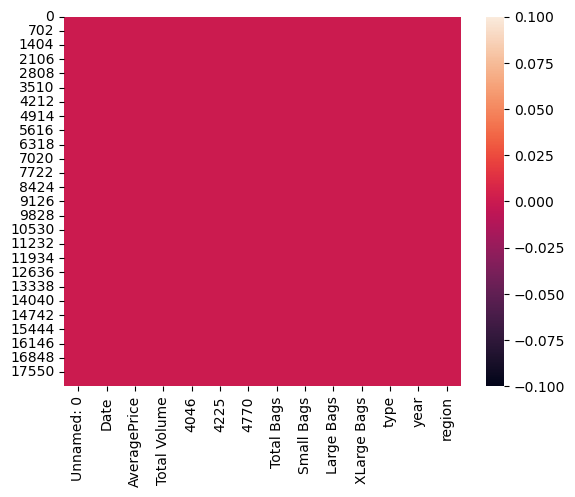

In [11]:
sns.heatmap(df.isnull())

In [12]:
# Checking for diblicate values

df.duplicated().sum()

0

There is no dublicate values.

In [13]:
#Checking for unique values of each column.

for i in df.columns:
    print(df[i].unique())
    print("\n")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]


['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11' '2015-01-04' '2016-12-25' '2016-12-18' '2016-12-11'
 '2016-12-04' '2016-11-27' '2016-11-20' '2016-11-13' '2016-11-06'
 '2016-10-30' '2016-10-23' '2016-10-16' '20

In [14]:
df.nunique().to_frame("Number of unique values")

,Number of unique values
Unnamed: 0,53
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082


In [15]:
#Checking the value counts of each column.

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
352

# Description of the dataset

In [16]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


That gives us statistical information about the columns.

In [17]:
# Statistical information of the Categorical Columns

df.describe(include='object')

,Date,type,region
count,18249,18249,18249
unique,169,2,54
top,2015-12-27,conventional,Albany
freq,108,9126,338


As that dataset contains numerical and categorical data we gonna separate the numerical and categorical columns.

In [18]:
cat_columns = []

for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        cat_columns.append(i)
print('Categorical Columns: ', cat_columns)
print('\n')


num_columns = []

for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_columns.append(i)
print('Numerical Columns: ', num_columns)

Categorical Columns:  ['Date', 'type', 'region']


Numerical Columns:  ['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']


# Data Visualization

## Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


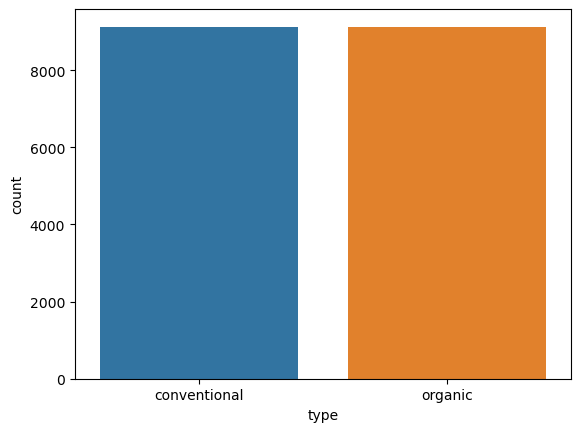

In [19]:
# Visualizing the type of the avocados.

ax=sns.countplot(x='type', data=df)
print(df['type'].value_counts())

There are 9126 conventional and 9123 organic type of avocado

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


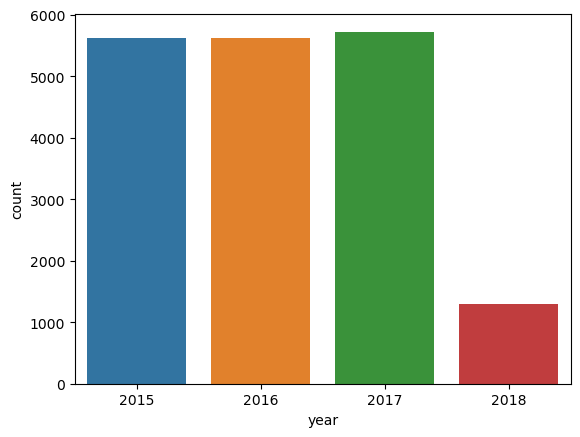

In [20]:
# Visualizing the year

ax=sns.countplot(x='year', data=df)
print(df['year'].value_counts())

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

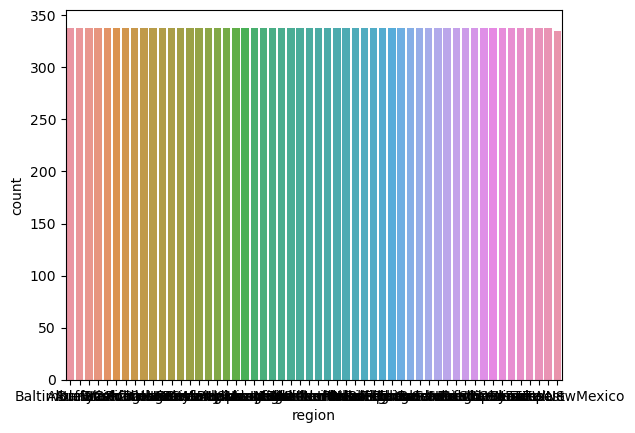

In [21]:
# Visualizing the Region of the avocados.

ax=sns.countplot(x='region', data=df)
print(df['region'].value_counts())

They observed the same amount of avocados (338) in every Region, just in WestTexNewMexico they observed 335 avocados.

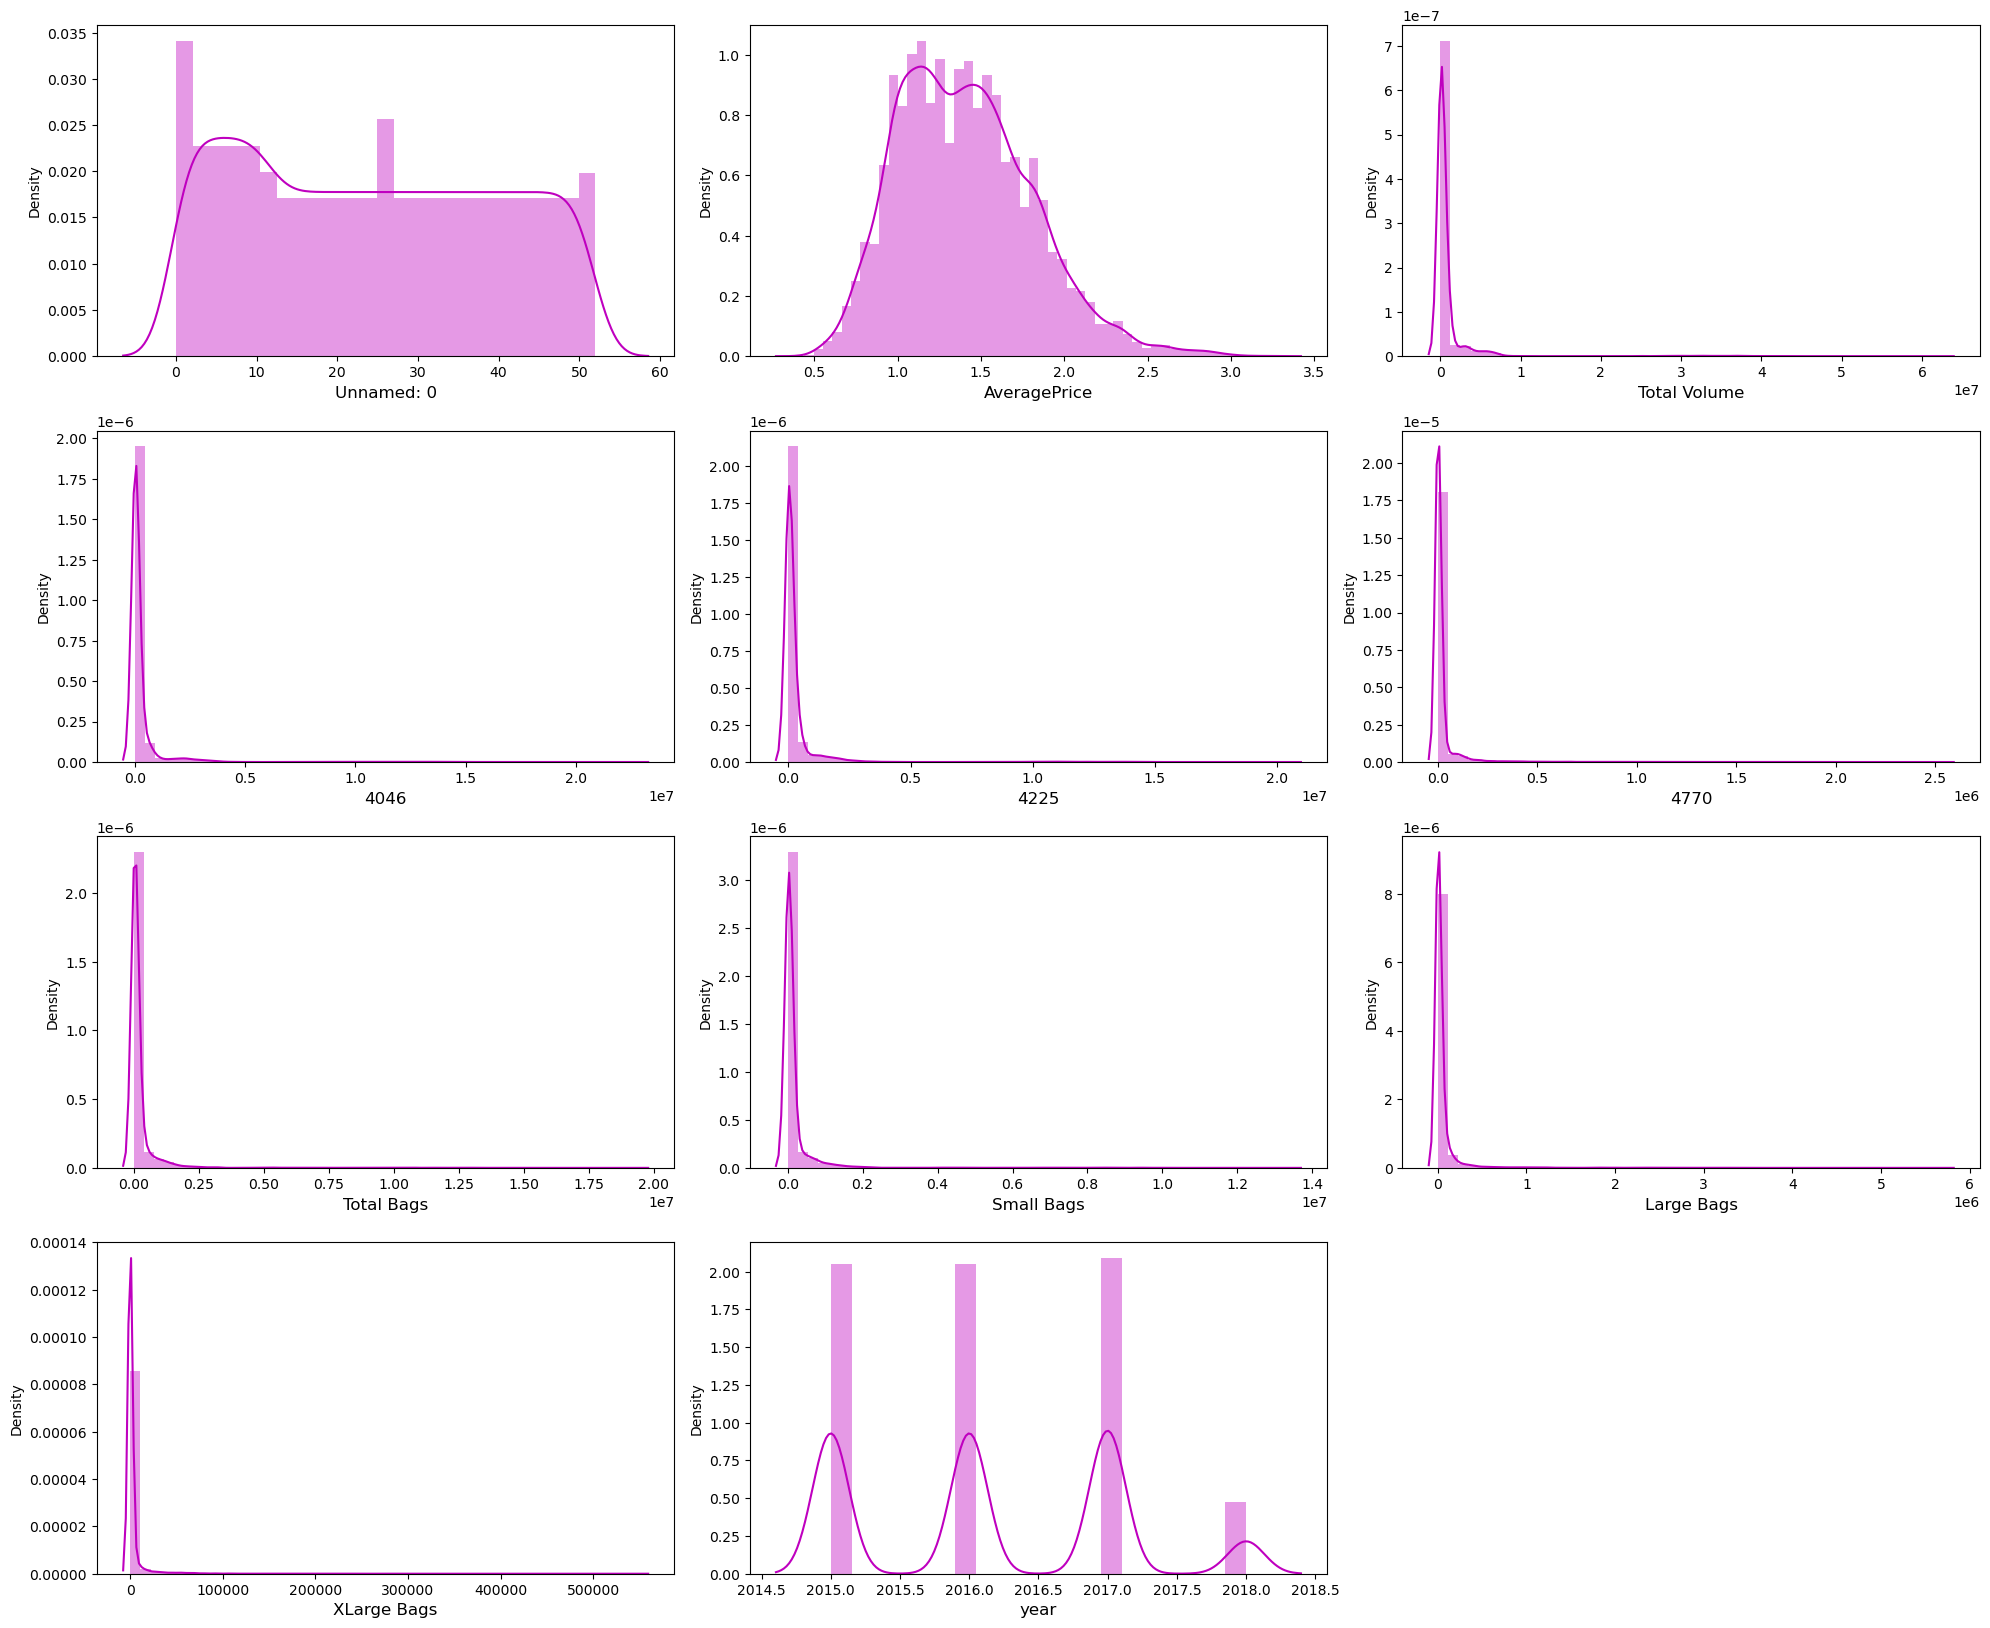

In [22]:
# Checking how the data has been distributed 

plt.figure(figsize=(20,20), facecolor='white')
plotnumber=1
for col in num_columns:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber) 
        sns.distplot(df[col],color='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

### Observation:

1. The data is highly skewed to the right in Total Volume, 4046, 4225, 4770.
2. The data is skewed to the right in Total Bags, Small Bags, Large Bags and XLarge Bags.

## Bivariate Analysis

<Axes: xlabel='year', ylabel='AveragePrice'>

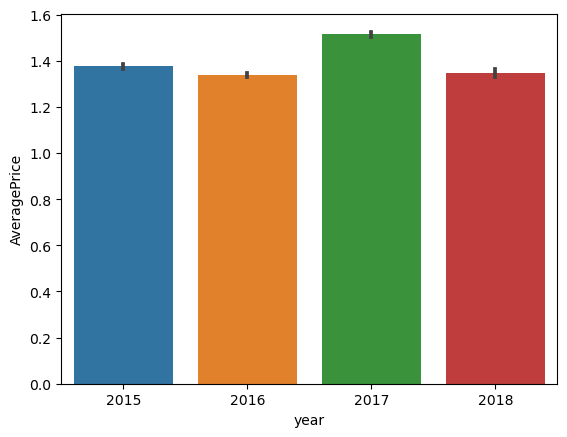

In [23]:
# Comparing Year vs Average Price

sns.barplot(x='year',y='AveragePrice',data=df)

The price of the avocados in 2017 is higher compared with the rest of the years. In 2016 the price is lower.

<Axes: xlabel='type', ylabel='AveragePrice'>

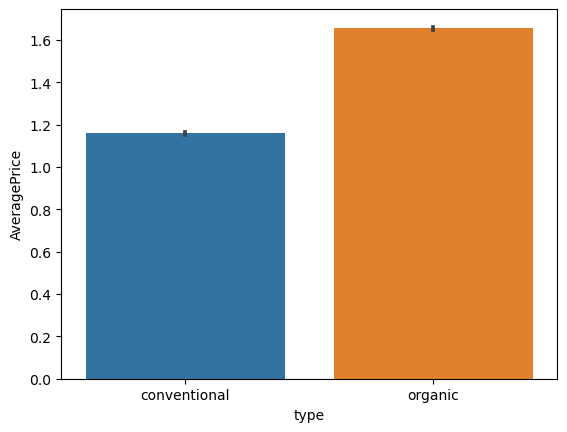

In [24]:
# Comparing Type vs Average Price

sns.barplot(x='type',y='AveragePrice',data=df)

The Average Price of organic avocadoes is higher than the conventional.

<Axes: xlabel='type', ylabel='4046'>

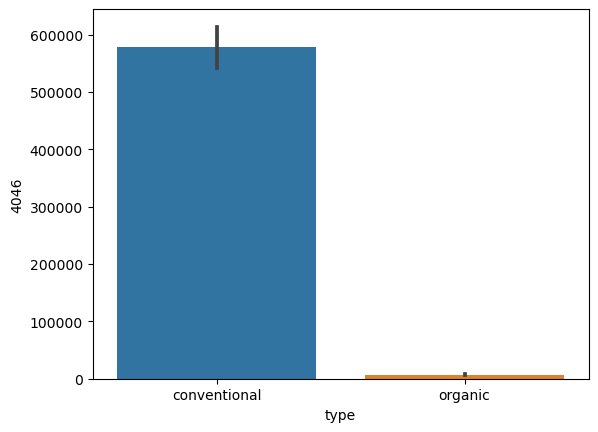

In [25]:
# Comparing the Type vs the Product Lookup codes (PLU’s) 4046

sns.barplot(x='type',y='4046',data=df)

The majority of avocadoes with PLU 4046 are conventional. Very small part of them are organic.

<Axes: xlabel='type', ylabel='4225'>

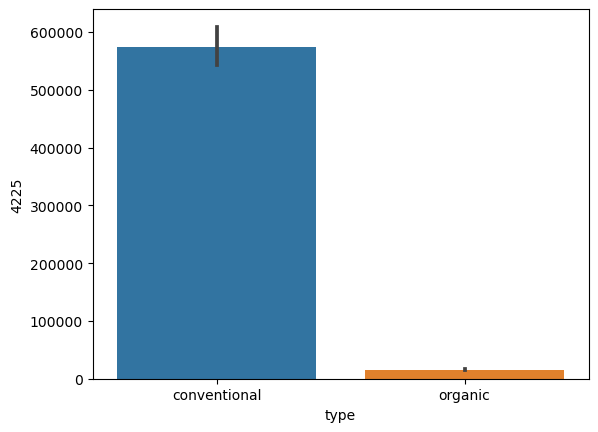

In [26]:
# Comparing the Type vs the Product Lookup codes (PLU’s) 4225

sns.barplot(x='type',y='4225',data=df)

The majority of avocadoes with PLU 4225 are conventional. Very small part of them are organic.

<Axes: xlabel='type', ylabel='4770'>

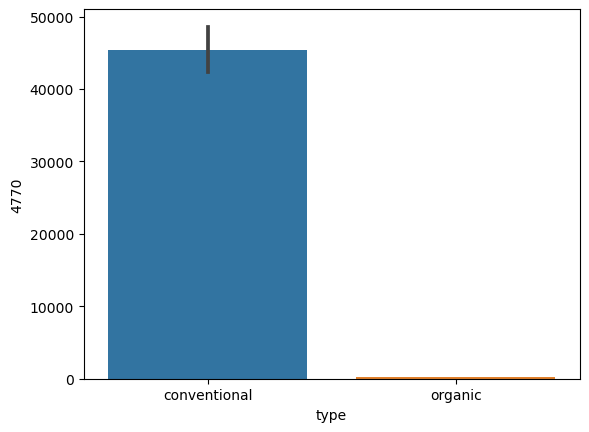

In [27]:
# Comparing the Type vs the Product Lookup codes (PLU’s) 4770

sns.barplot(x='type',y='4770',data=df)

The majority of avocadoes with PLU 4770 are conventional. Very small part of them are organic.

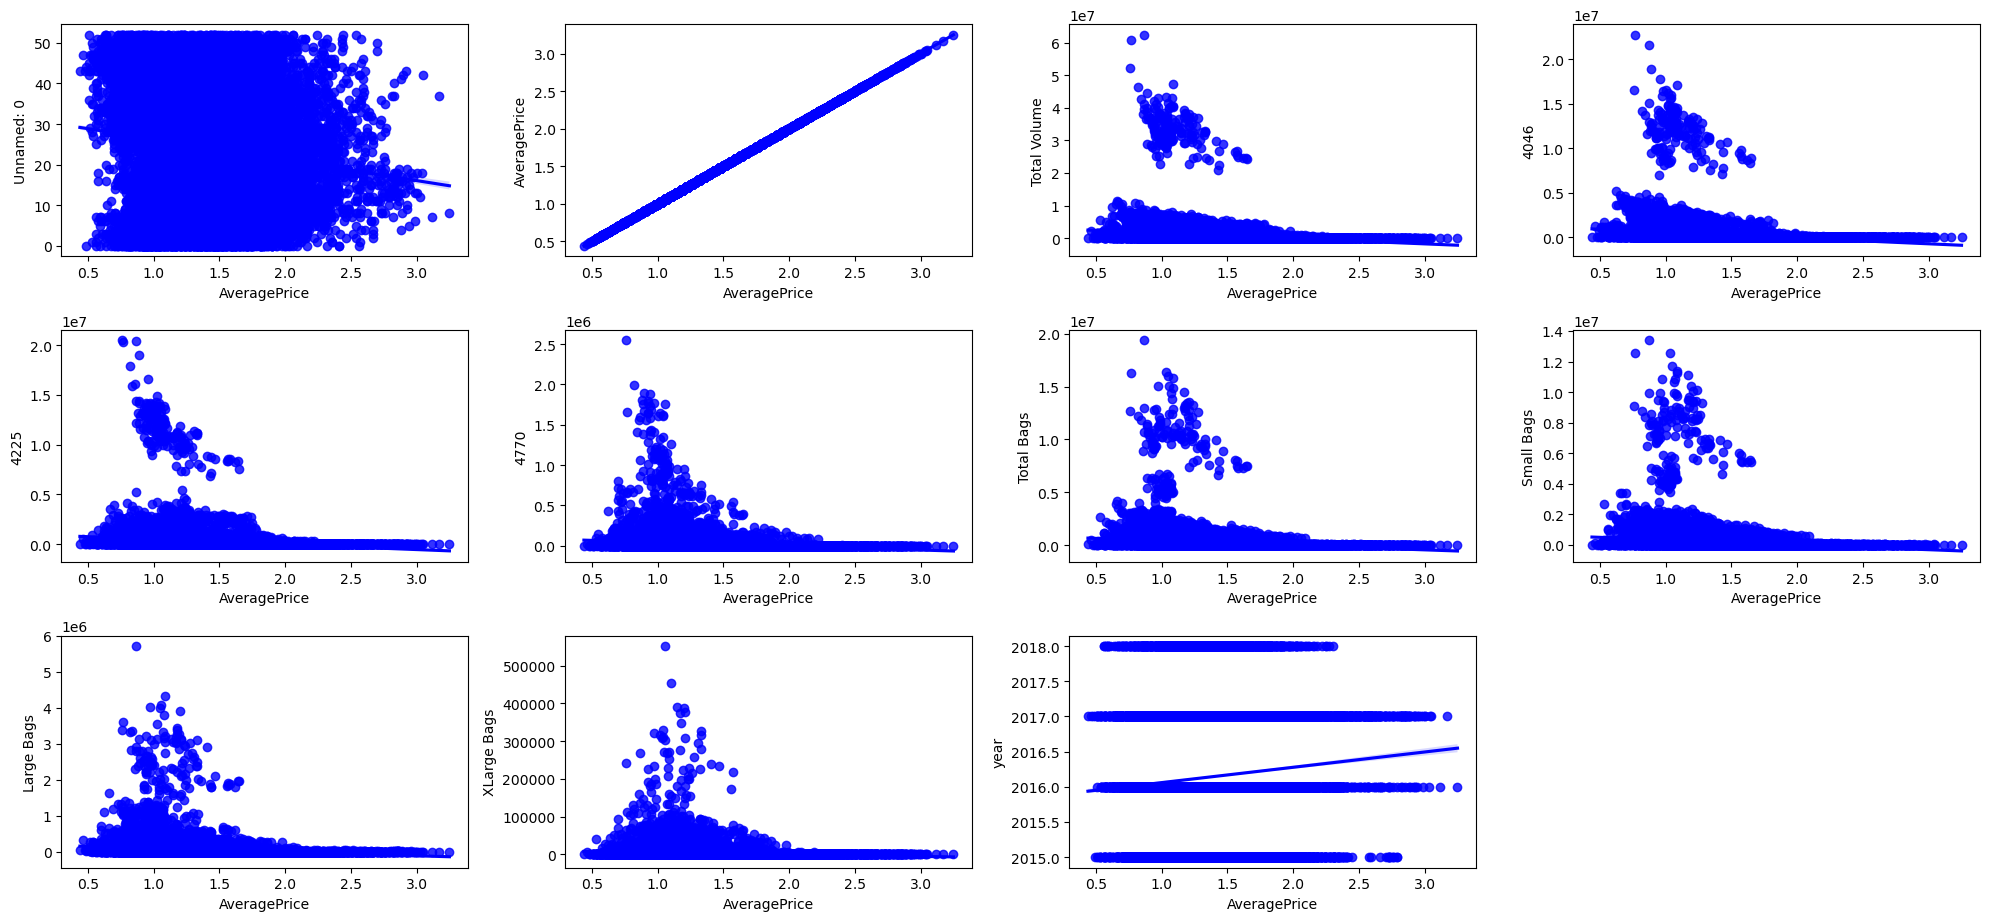

In [28]:
# Avarage Price vs numerical columns

plt.figure(figsize=(20,15), facecolor='white')
p=1
for i in num_columns:
    if p<=20:    
        plt.subplot(5,4,p) 
        sns.regplot(x='AveragePrice',y=i,data=df,color='b')
        plt.xlabel("AveragePrice")
        plt.ylabel(i)
    p+=1
    
plt.tight_layout()
plt.show()

The majority of the avocadoes are with average price between 0.5 and 2.0.

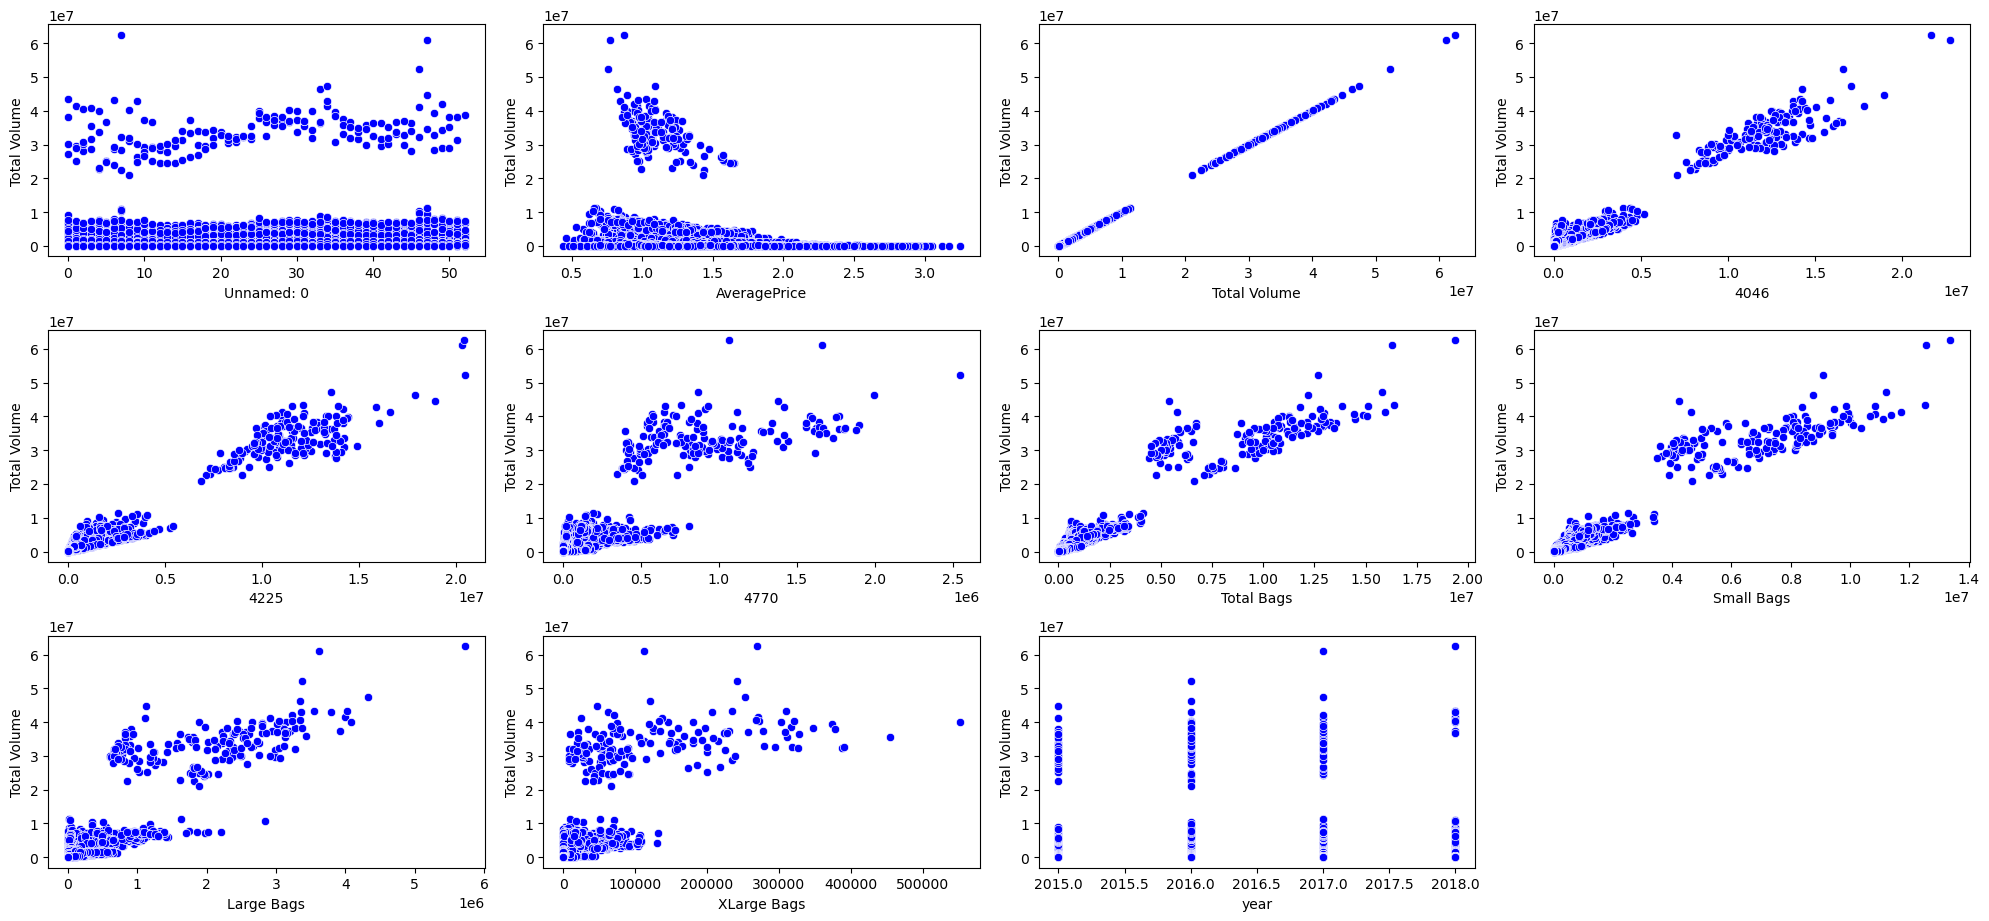

In [29]:
#Total Volume vs numerical columns

plt.figure(figsize=(20, 15), facecolor='white')
plotnumber=1

for i in num_columns:
    if plotnumber <=20:
        ax = plt.subplot(5,4, plotnumber)
        sns.scatterplot(x=df[i], y='Total Volume', data=df, color='b')
    plotnumber += 1
        
plt.tight_layout()
plt.show()

### Observation:

1. As the Volume increases the PLU numbers increses too. 
2. As the volume increases the number of all sizes bags increses too.

## Multivariate Analysis

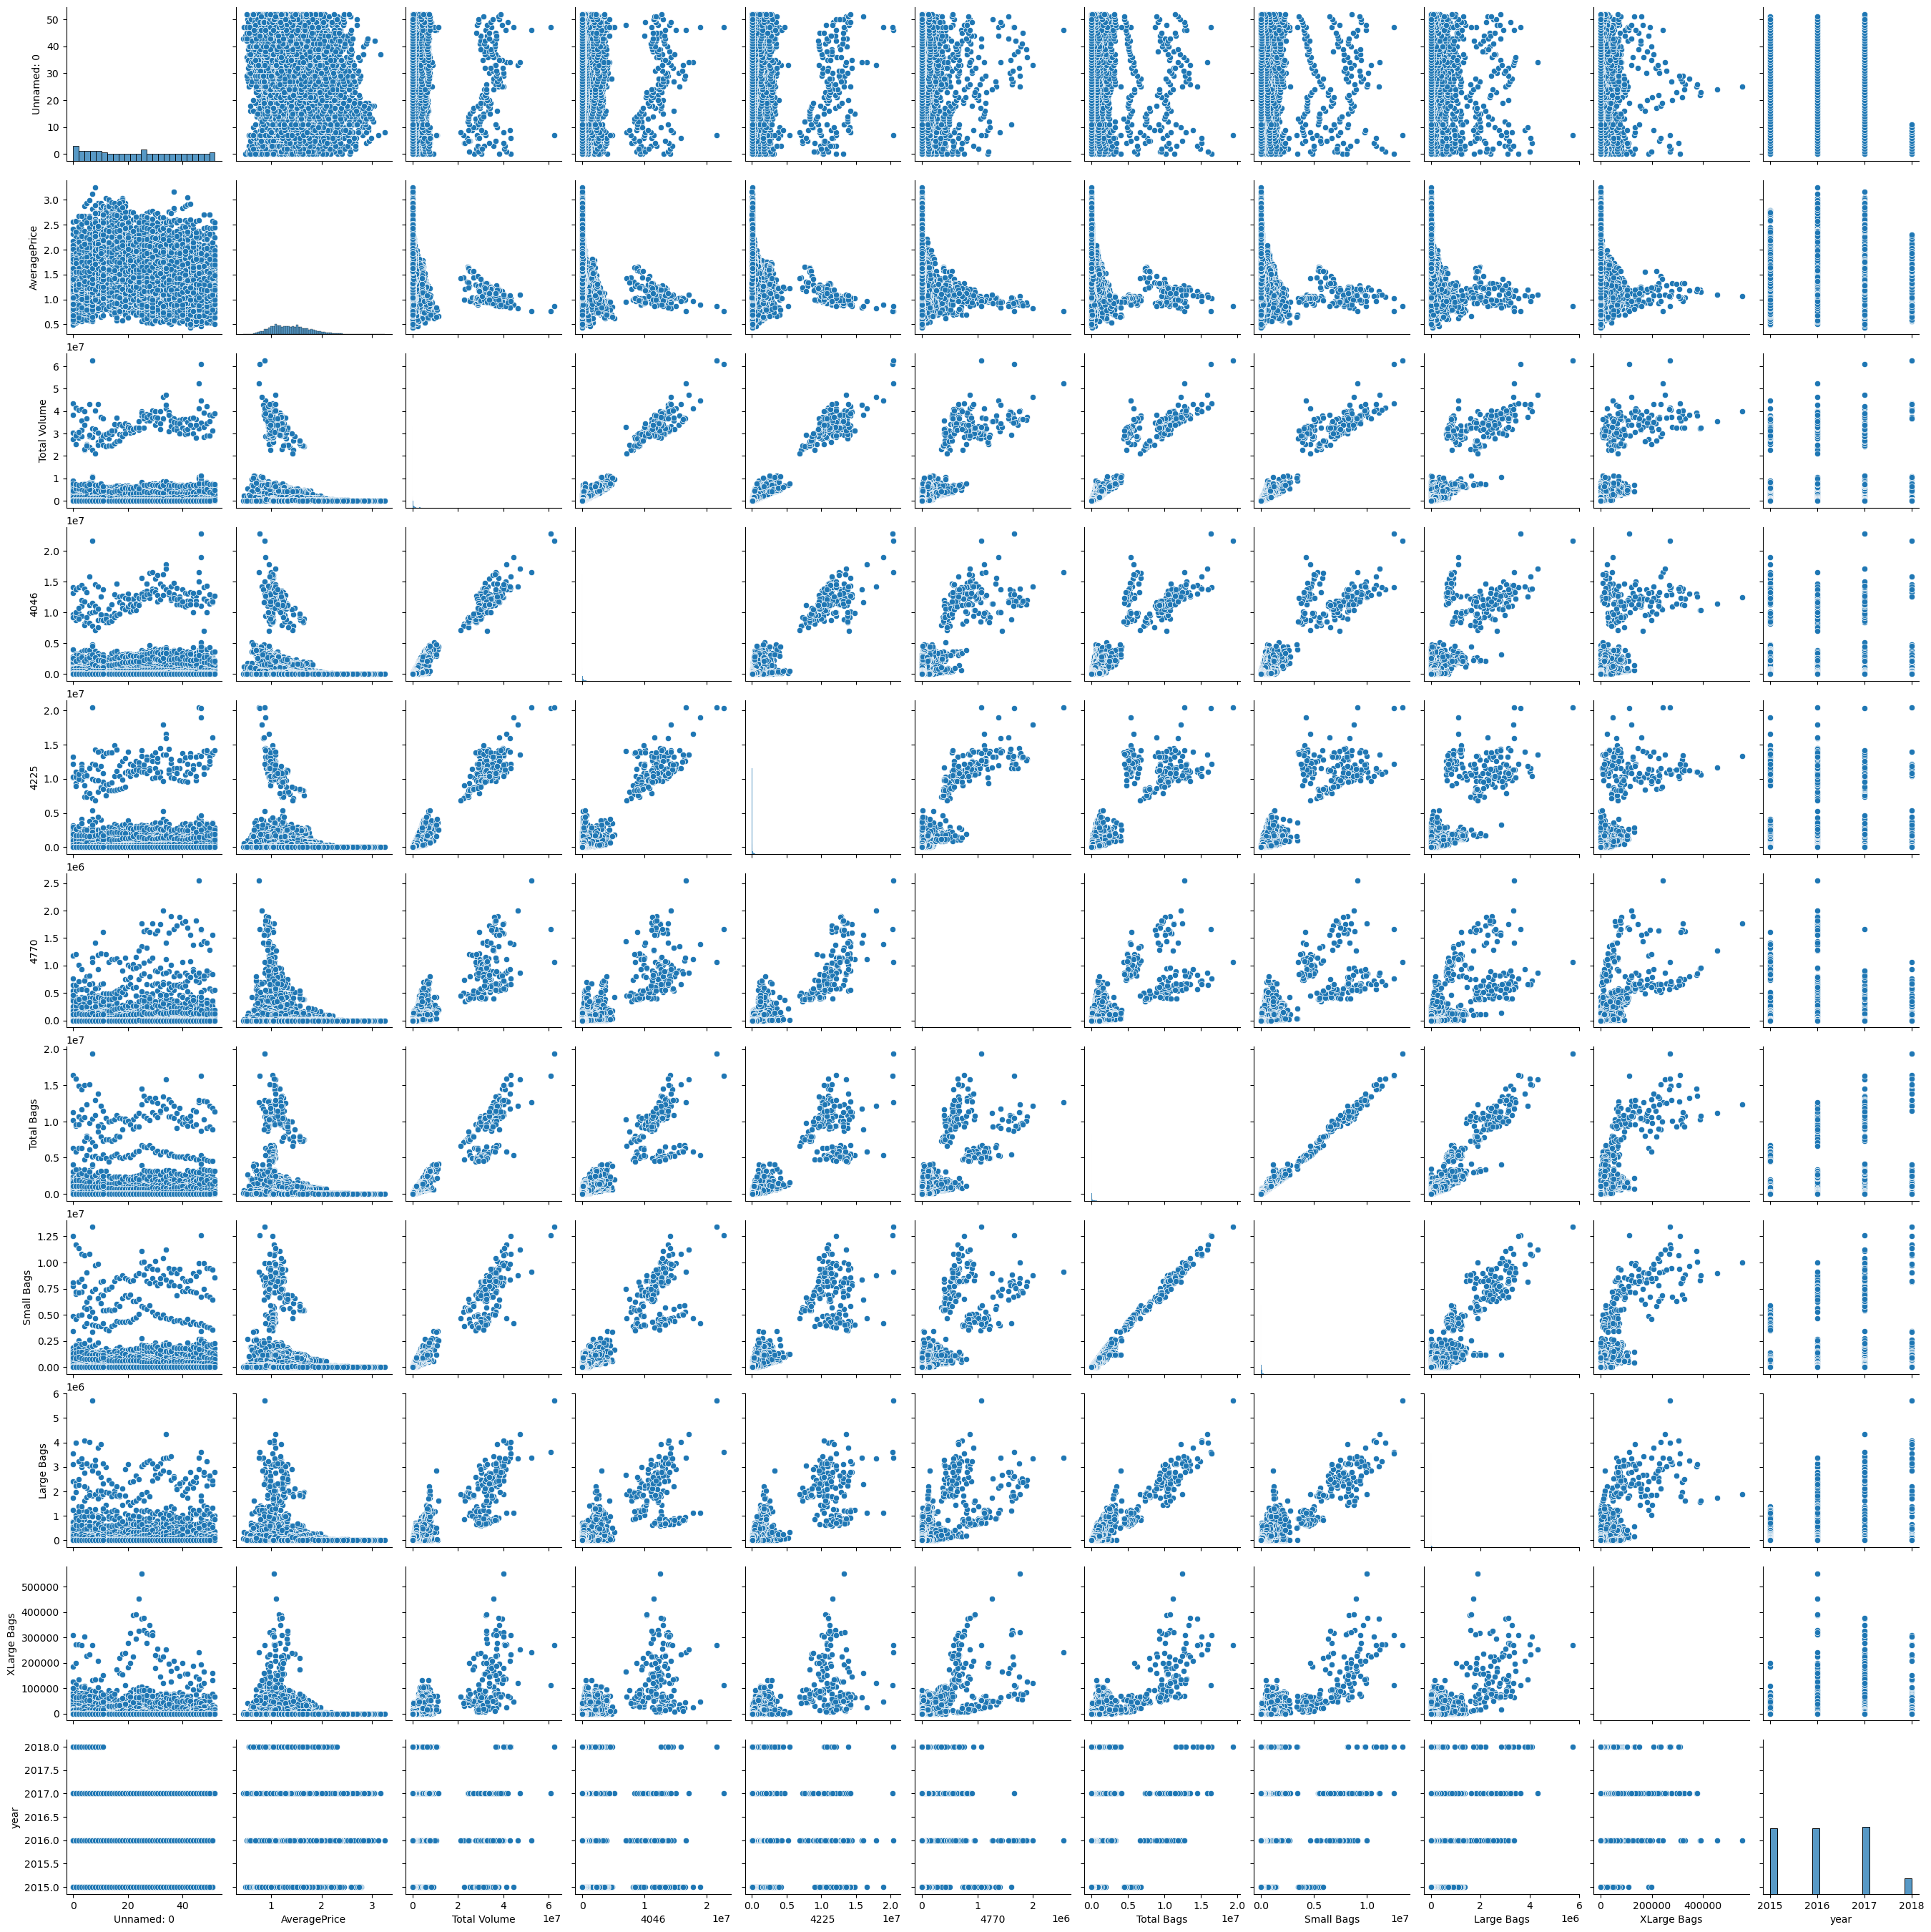

In [30]:
sns.pairplot(df)
plt.show()

In [31]:
# Dropping the Unnamed column as we don't have use of it

df=df.drop(['Unnamed: 0'], axis=1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [34]:
# Deleting 'Unnamed' from num_columns

del(num_columns[0])
num_columns

['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year']

## Checking for outliers

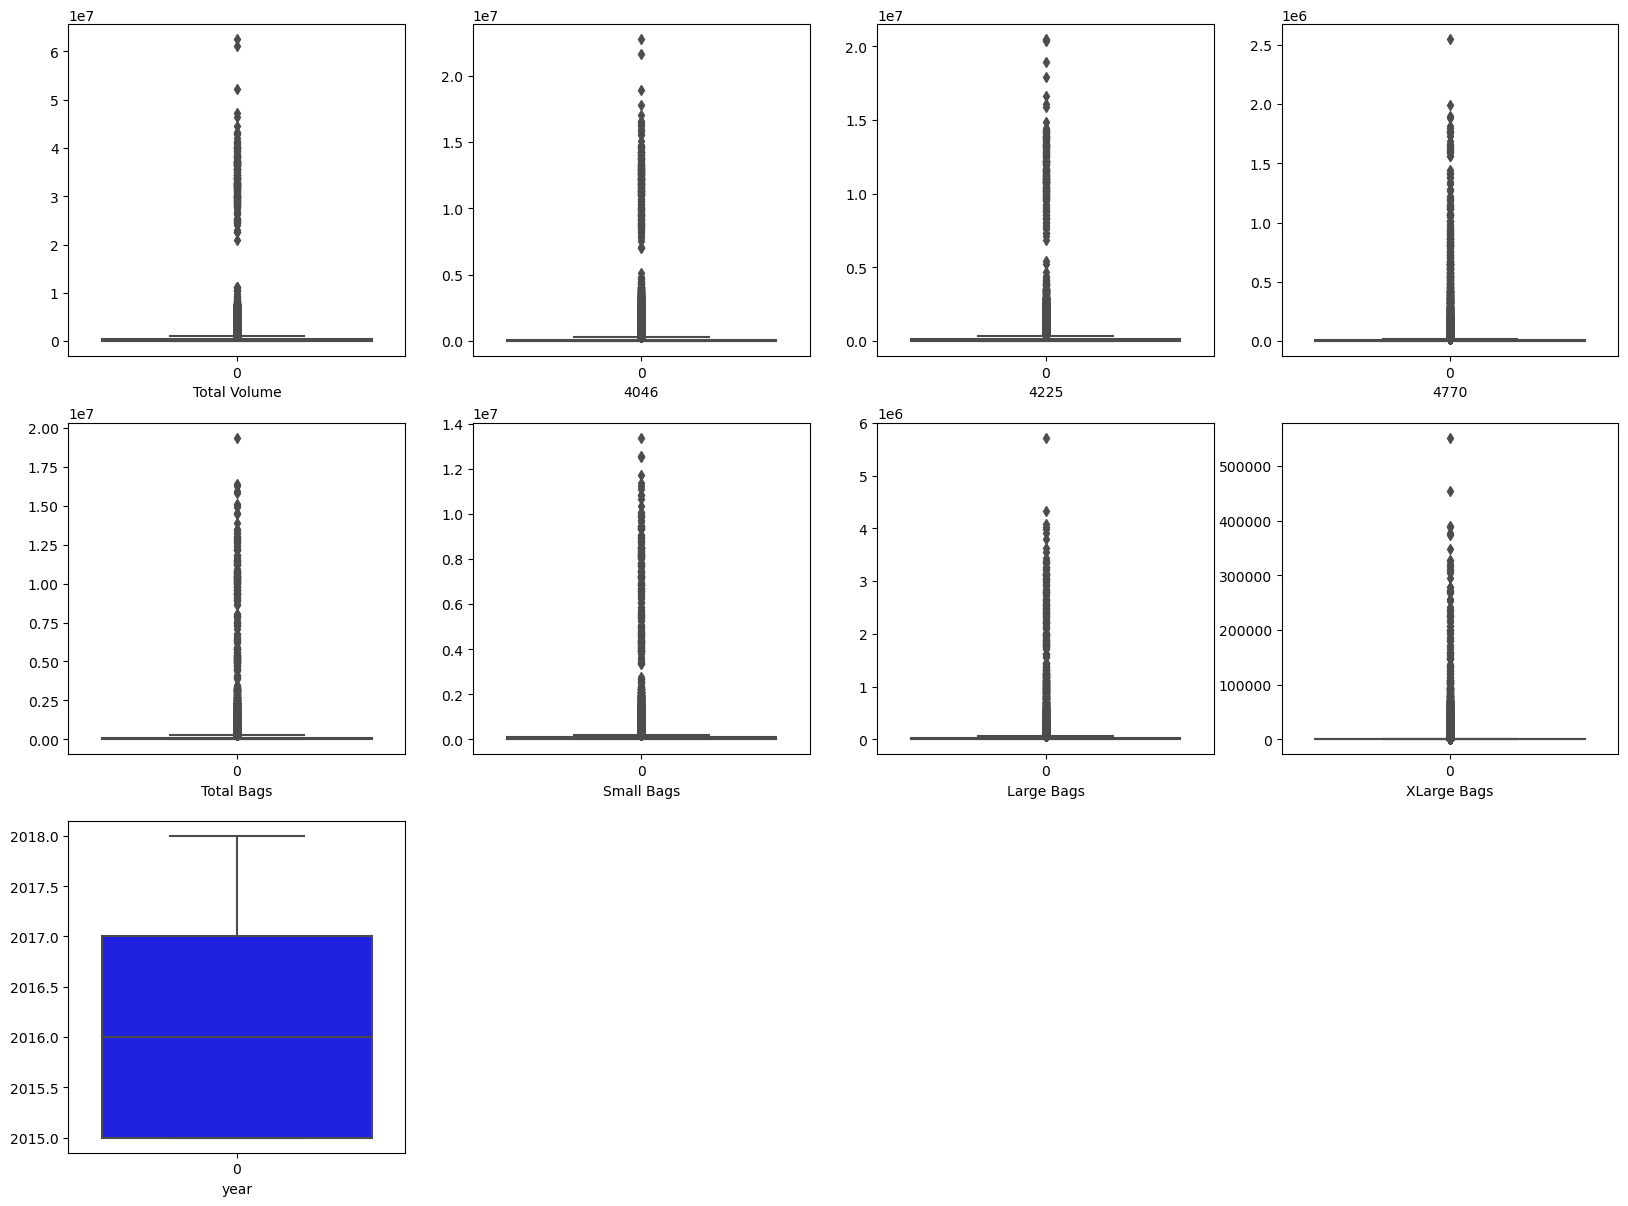

In [35]:
# Checking for outliers only for numerical columns

plt.figure(figsize=(20,25))
pnum=1
for i in num_columns:
    if pnum<=18:
        plt.subplot(5,4,pnum)
        sns.boxplot(df[i],color='b')
        plt.xlabel(i)
    pnum+=1
plt.show()

As we can see there is outliers present except from the year column. We need to remove them.

## Removing the outliers

In [36]:
from scipy.stats import zscore

outliers=df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
z=np.abs(zscore(outliers))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [37]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [38]:
df_new=df[(z<3).all(axis=1)]  
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


598 rows have been removed as outliers.

In [39]:
# Checking the data loss percentage after removing the outliers

print("Data Loss Percentage:", ((df.shape[0]-df_new.shape[0])/df.shape[0])*100)    

Data Loss Percentage: 3.276891884486821


## Checking for skewness

In [40]:
df_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
dtype: float64

There is skewness in almost all columns except AveragePrice and year.

In [41]:
df=df_new

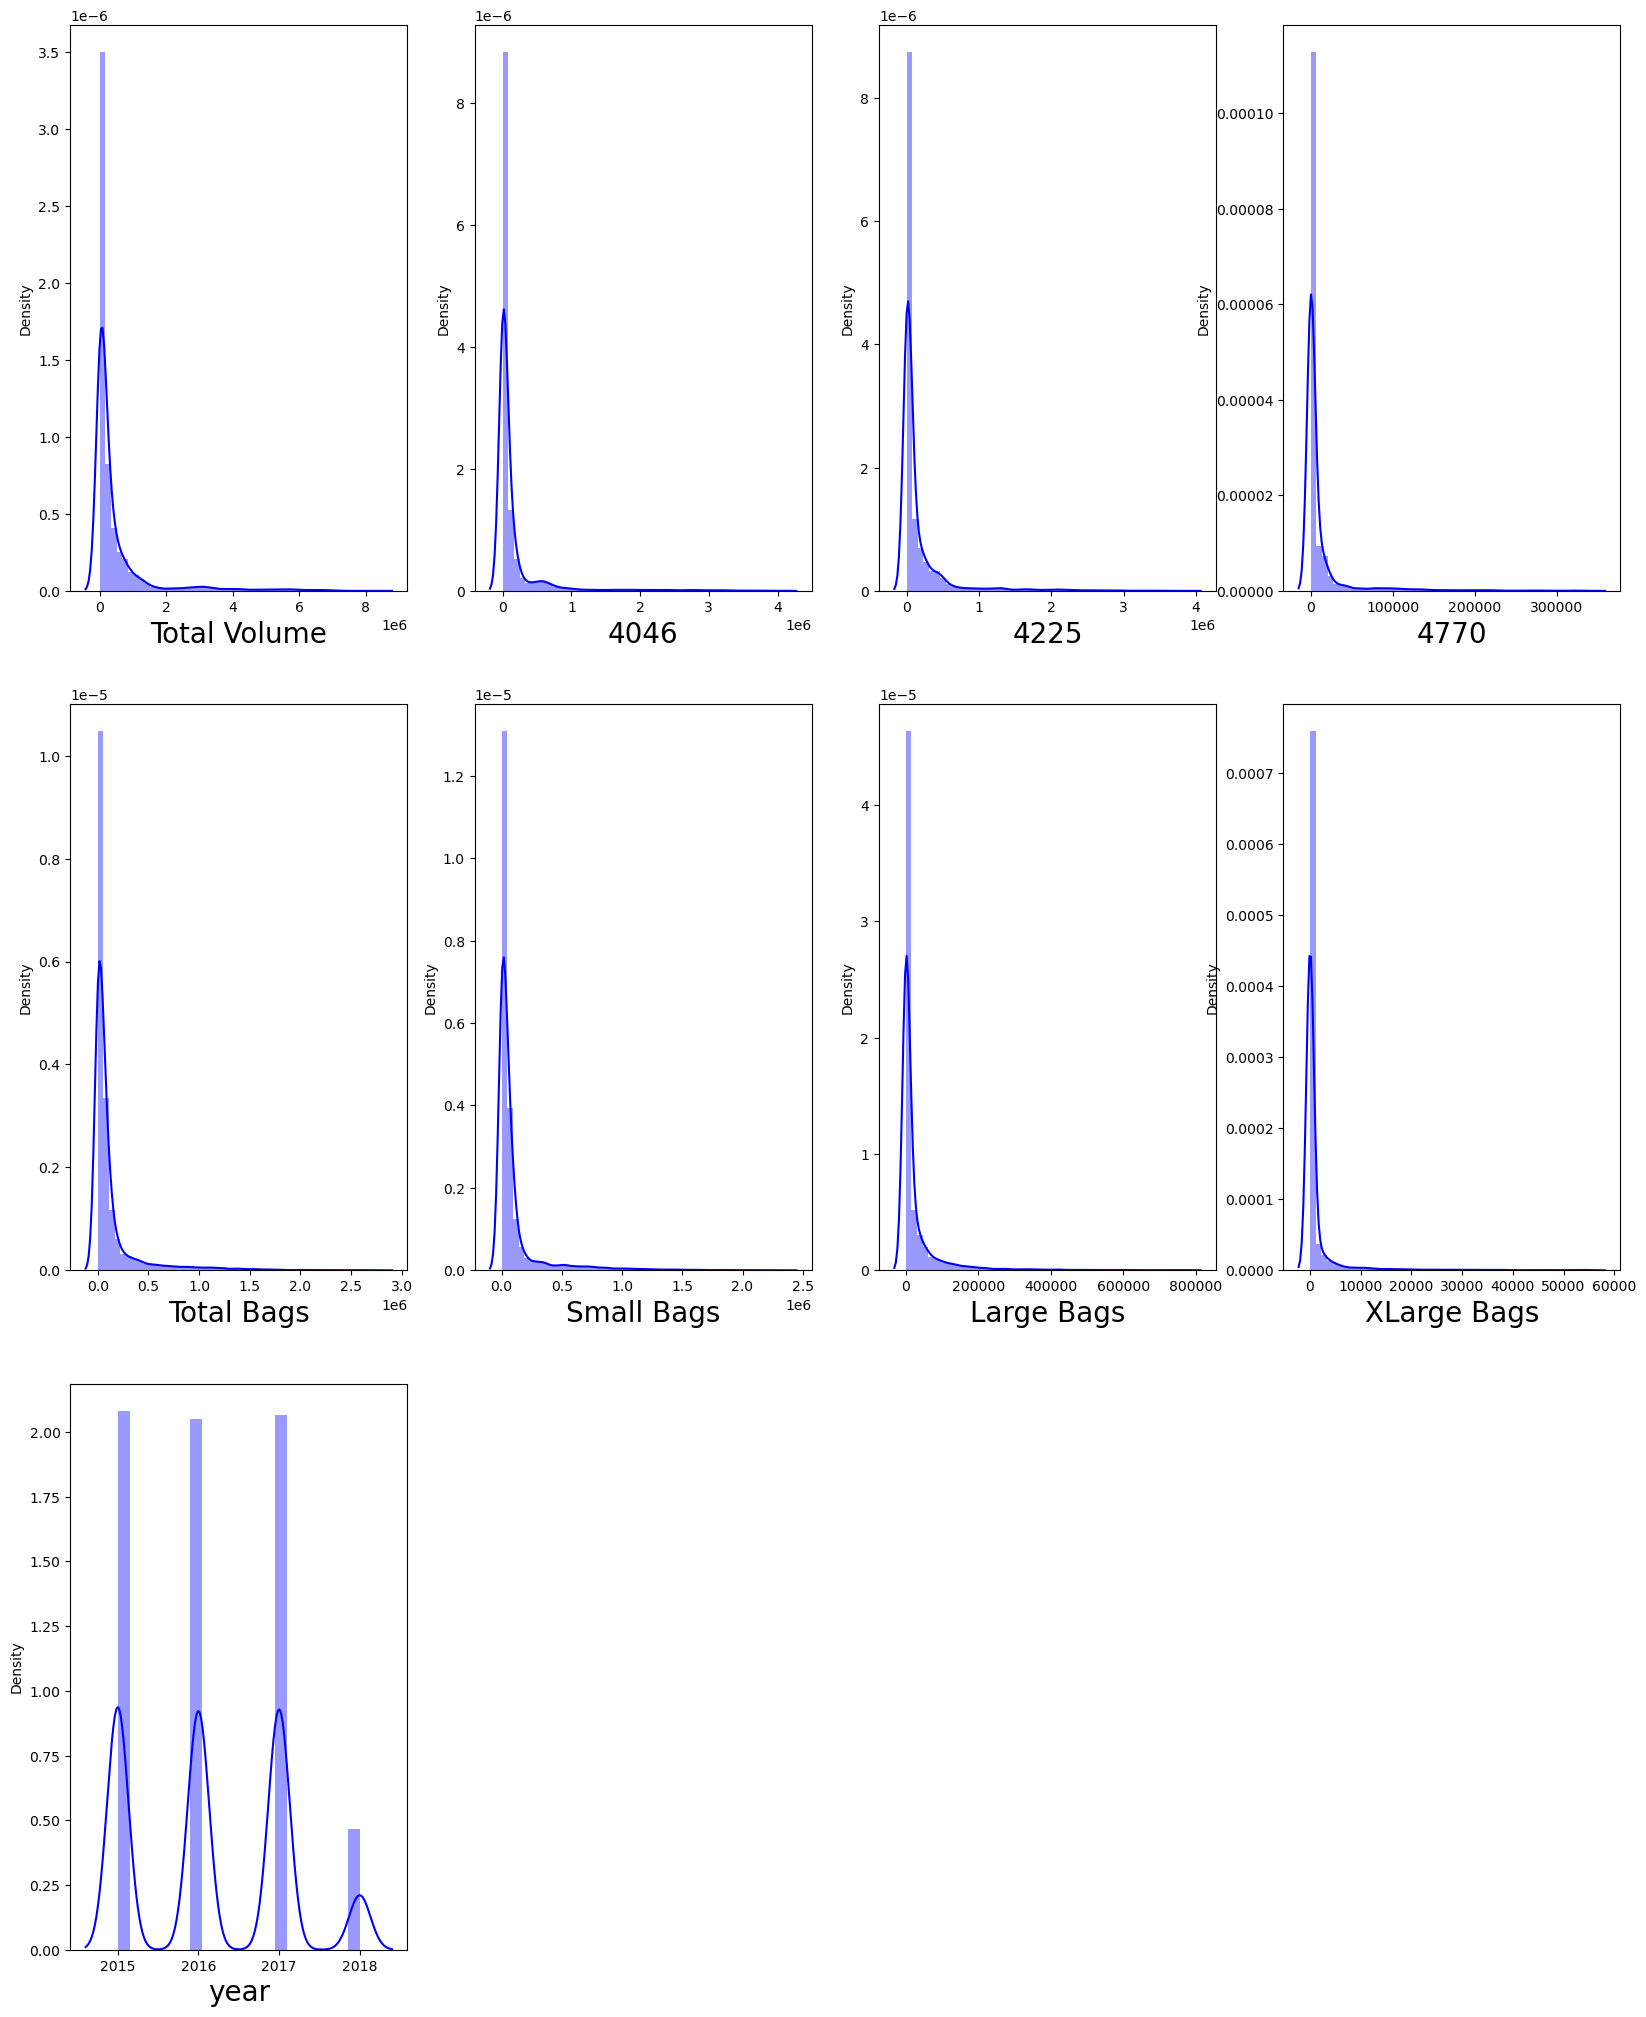

<Figure size 640x480 with 0 Axes>

In [42]:
plt.figure(figsize=(20,25), facecolor='white')

plotnumber=1

for i in num_columns:   
    if plotnumber<=10:
        plt.subplot(3,4,plotnumber)
        sns.distplot(df[i],color='b')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()
plt.tight_layout()

The data is skewed to the right.

## Removing of skewness

In [43]:
df['Total Volume'] = df['Total Volume'].apply(lambda x: np.cbrt(x))
df['4046'] = df['4046'].apply(lambda x: np.cbrt(x))
df['4225'] = df['4225'].apply(lambda x: np.cbrt(x))
df['4770'] = df['4770'].apply(lambda x: np.cbrt(x))
df['Total Bags'] = df['Total Bags'].apply(lambda x: np.cbrt(x))
df['Small Bags'] = df['Small Bags'].apply(lambda x: np.cbrt(x))
df['Large Bags'] = df['Large Bags'].apply(lambda x: np.cbrt(x))
df['XLarge Bags'] = df['XLarge Bags'].apply(lambda x: np.cbrt(x))

In [44]:
df.skew()

AveragePrice    0.377432
Total Volume    1.240435
4046            1.555876
4225            1.277025
4770            1.635614
Total Bags      1.231831
Small Bags      1.246033
Large Bags      1.276213
XLarge Bags     2.277028
year            0.229976
dtype: float64

The skewness have been reduced.

## Encoding categorical data

In [45]:
# Encoding the categorical data into numerical using Label Encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])

In [46]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0,2015,0
1,2015-12-20,1.35,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0,2015,0
2,2015-12-13,0.93,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0,2015,0
3,2015-12-06,1.08,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0,2015,0
4,2015-11-29,1.28,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0,2015,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17651 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          17651 non-null  object 
 1   AveragePrice  17651 non-null  float64
 2   Total Volume  17651 non-null  float64
 3   4046          17651 non-null  float64
 4   4225          17651 non-null  float64
 5   4770          17651 non-null  float64
 6   Total Bags    17651 non-null  float64
 7   Small Bags    17651 non-null  float64
 8   Large Bags    17651 non-null  float64
 9   XLarge Bags   17651 non-null  float64
 10  type          17651 non-null  int32  
 11  year          17651 non-null  int64  
 12  region        17651 non-null  int32  
dtypes: float64(9), int32(2), int64(1), object(1)
memory usage: 1.8+ MB


In [48]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000
mean,1.405363,53.814959,31.247679,36.201185,10.830243,36.316593,32.401958,18.075787,3.624280,0.509433,2016.137669,26.103110
std,0.385793,38.237423,29.771502,28.542225,13.469233,24.288722,23.005125,16.994765,6.992020,0.499925,0.940239,15.396005
min,0.440000,4.389230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000
25%,1.110000,21.943734,9.367220,14.243594,0.000000,17.053786,14.004105,4.829734,0.000000,0.000000,2015.000000,13.000000
50%,1.380000,46.447915,19.819408,29.889885,5.473259,33.490262,29.060346,13.478539,0.000000,1.000000,2016.000000,26.000000
75%,1.660000,73.135318,46.167775,50.501867,17.418230,46.726616,42.797645,26.725732,4.192086,1.000000,2017.000000,39.000000
max,2.610000,202.976354,159.867844,157.336125,70.101113,140.655522,132.928930,92.108540,38.245030,1.000000,2018.000000,53.000000


## Checking the correlation between the target variable and the independent variables.

In [49]:
cor=df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.528935,-0.538927,-0.430888,-0.451147,-0.504768,-0.458453,-0.454450,-0.300001,0.613150,0.091704,-0.003242
Total Volume,-0.528935,1.000000,0.903102,0.940370,0.793520,0.953857,0.941018,0.731893,0.623303,-0.717424,0.039580,0.076952
4046,-0.538927,0.903102,1.000000,0.742185,0.704297,0.833500,0.818643,0.671638,0.570552,-0.649432,-0.007901,0.155491
4225,-0.430888,0.940370,0.742185,1.000000,0.778158,0.863948,0.861860,0.626928,0.566096,-0.687835,-0.020441,0.025405
4770,-0.451147,0.793520,0.704297,0.778158,1.000000,0.721926,0.730112,0.497304,0.619253,-0.642326,-0.089506,-0.030916
Total Bags,-0.504768,0.953857,0.833500,0.863948,0.721926,1.000000,0.973676,0.792434,0.628105,-0.658982,0.171073,0.087521
Small Bags,-0.458453,0.941018,0.818643,0.861860,0.730112,0.973676,1.000000,0.656224,0.628709,-0.659243,0.152041,0.076144
Large Bags,-0.454450,0.731893,0.671638,0.626928,0.497304,0.792434,0.656224,1.000000,0.434630,-0.475409,0.177150,0.117769
XLarge Bags,-0.300001,0.623303,0.570552,0.566096,0.619253,0.628105,0.628709,0.434630,1.000000,-0.520516,0.155129,-0.044703
type,0.613150,-0.717424,-0.649432,-0.687835,-0.642326,-0.658982,-0.659243,-0.475409,-0.520516,1.000000,0.003867,0.018409


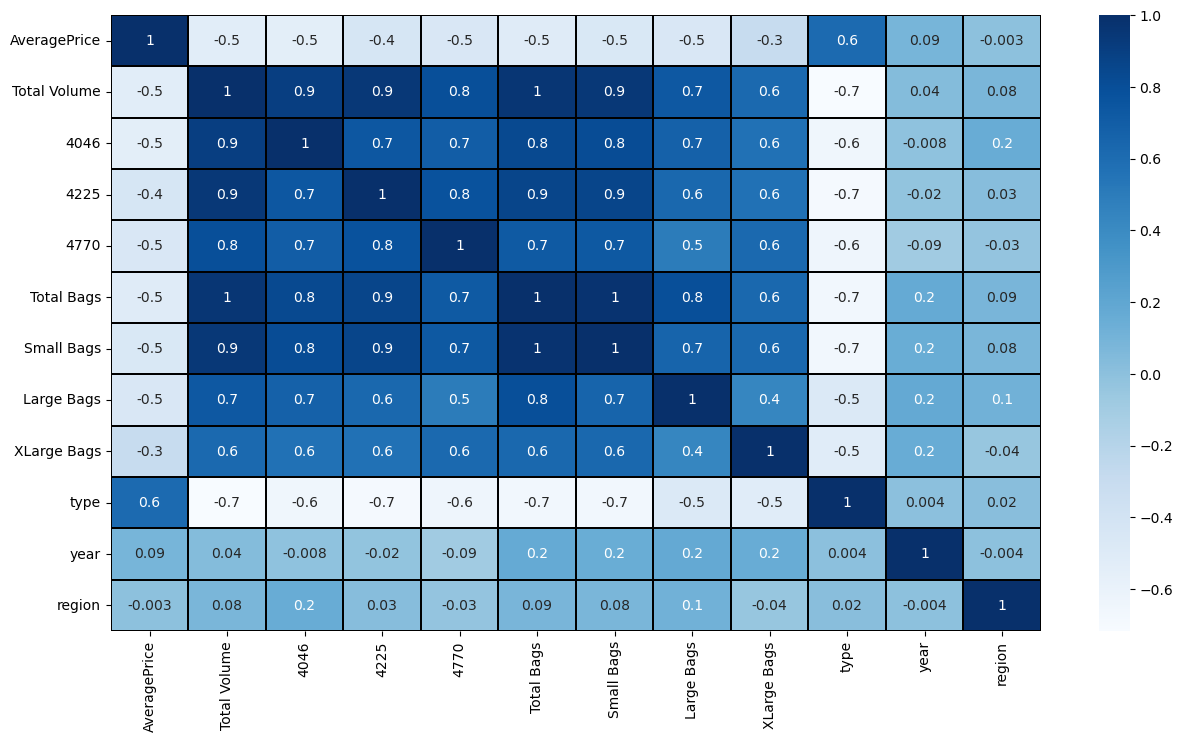

In [201]:
# Vusualizing the correlation

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), linewidths=0.1,fmt='.1g',linecolor='black', annot = True, cmap = 'Blues')
plt.yticks(rotation=0);
plt.show()

## Correlation with region as a target variable

In [51]:
#Correlation when we have region as a target

cor_region=cor['region'].sort_values(ascending=False)
cor_region

region          1.000000
4046            0.155491
Large Bags      0.117769
Total Bags      0.087521
Total Volume    0.076952
Small Bags      0.076144
4225            0.025405
type            0.018409
AveragePrice   -0.003242
year           -0.004417
4770           -0.030916
XLarge Bags    -0.044703
Name: region, dtype: float64

As we can see none of the features is highly correlated to the target variable 'region'

## Visualizing correlation with 'region'

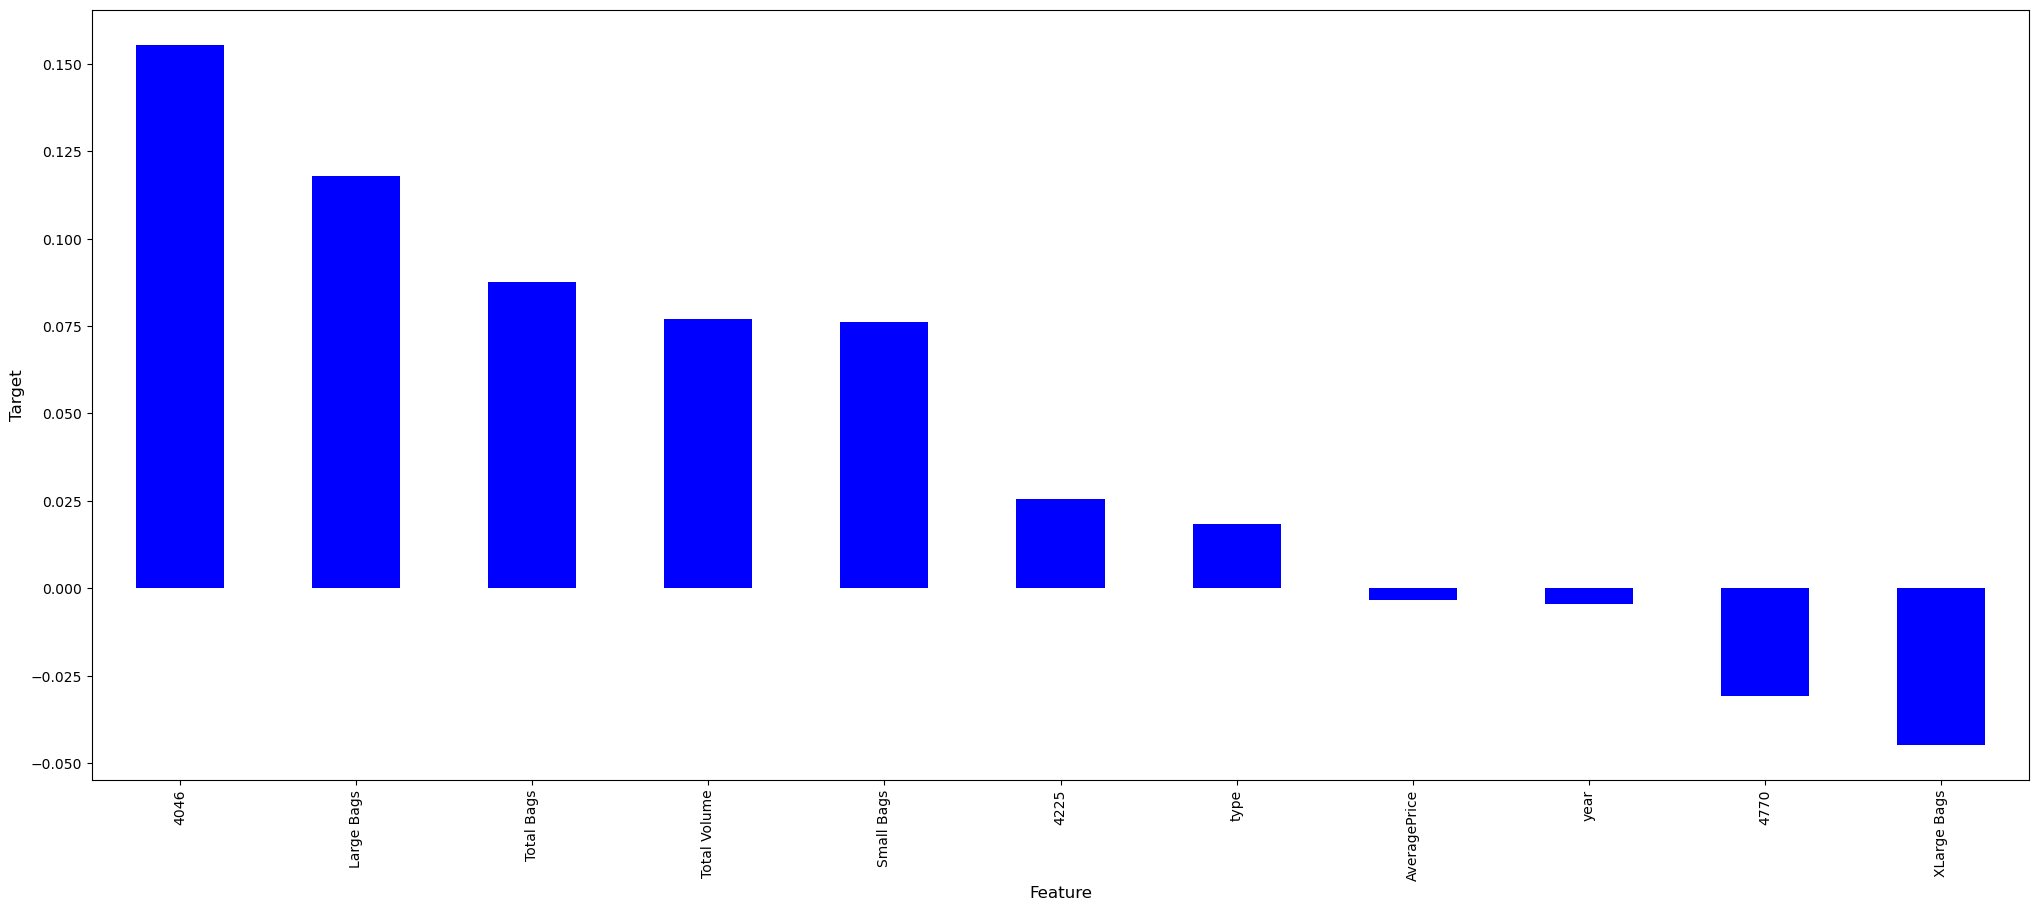

In [52]:
plt.figure(figsize=(25,10))

df_new.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='b')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.show()

## Correlation with 'AveragePrice' as a target variable

In [53]:
## Correlation when AveragePrice as a target

cor_AveragePrice=cor['AveragePrice'].sort_values(ascending=False)
cor_AveragePrice

AveragePrice    1.000000
type            0.613150
year            0.091704
region         -0.003242
XLarge Bags    -0.300001
4225           -0.430888
4770           -0.451147
Large Bags     -0.454450
Small Bags     -0.458453
Total Bags     -0.504768
Total Volume   -0.528935
4046           -0.538927
Name: AveragePrice, dtype: float64

1. The features 4225, Large Bags, 4770, Small bags, 4046, Total Bags, Total Volume show negative correlation with AveragePrice.
2. Type shows positive correlation with AveragePrice.

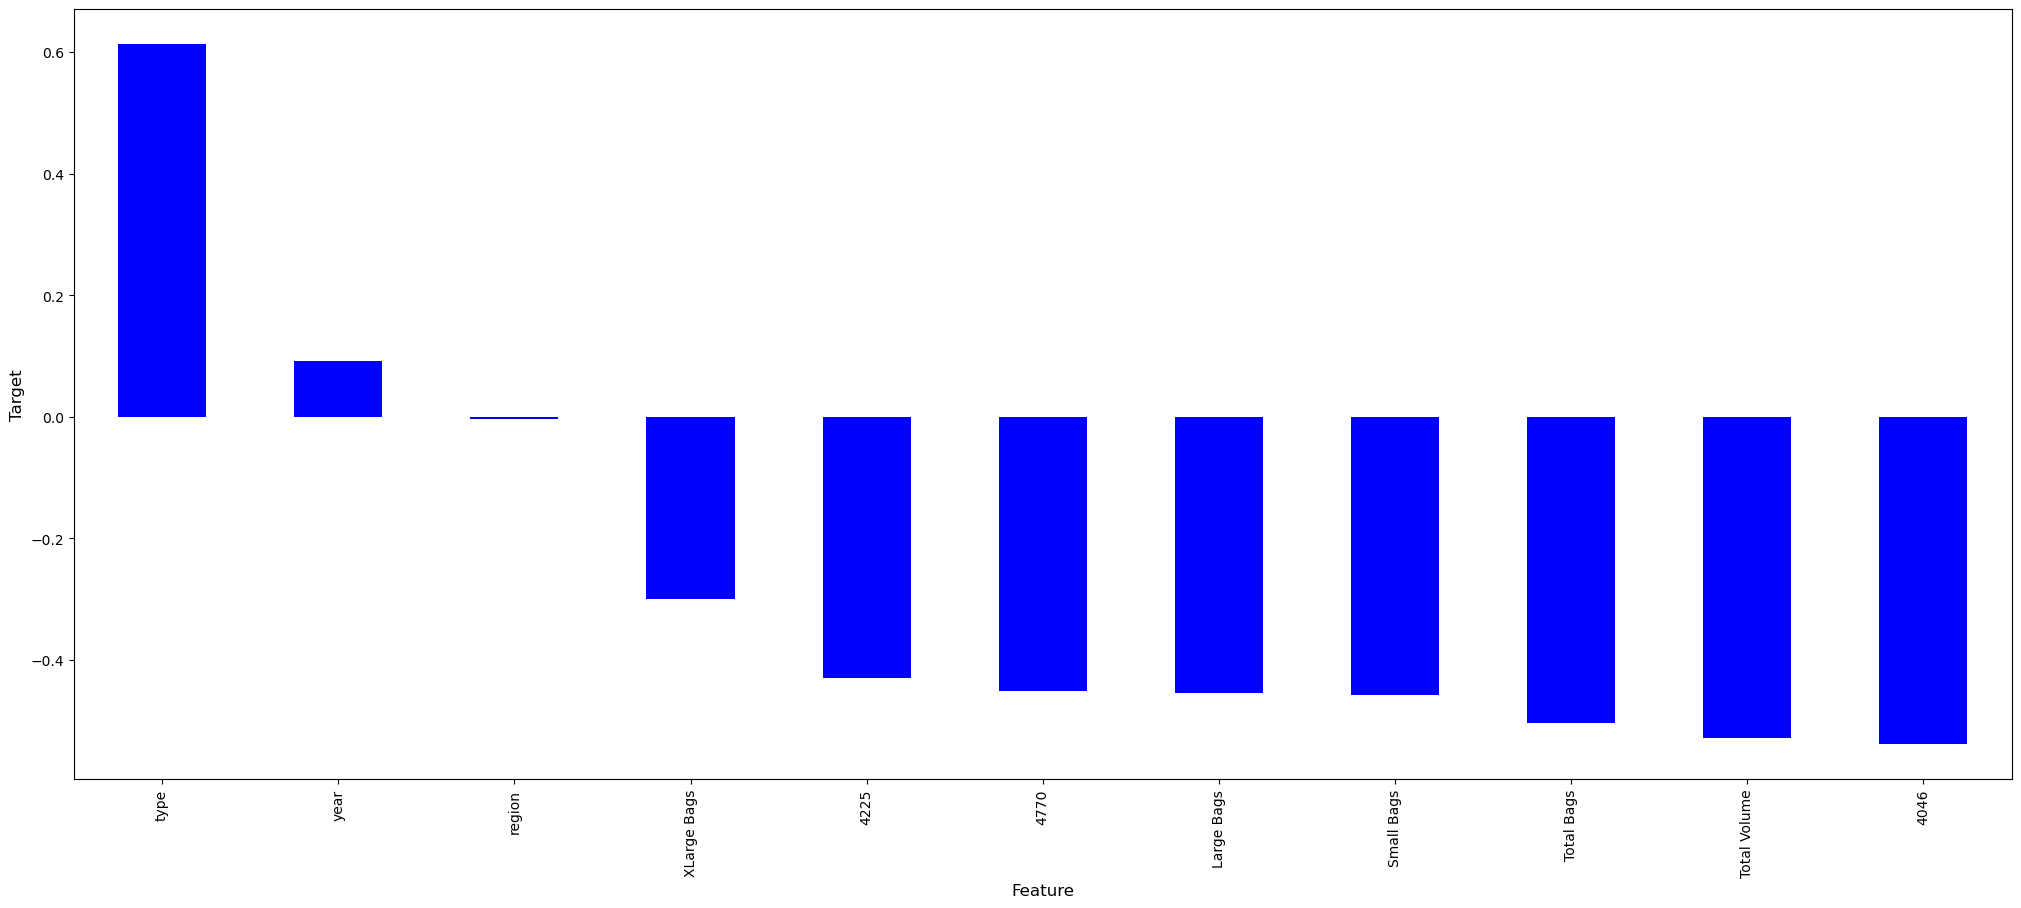

In [54]:
plt.figure(figsize=(25,10))

df_new.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='b')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.show()

# Classification Task ('region' as target)

## Separating features and label

In [55]:
x=df.drop(['region', 'Date'],axis=1)
y=df['region']

## Feature Scaling using Standard Scalarization

In [56]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.195352,-0.360017,-0.709648,0.059642,-0.533970,-0.648548,-0.517773,-0.796802,-0.51836,-1.019047,-1.210013
1,-0.143510,-0.413581,-0.755064,-0.025495,-0.516157,-0.623078,-0.490834,-0.792817,-0.51836,-1.019047,-1.210013
2,-1.232207,-0.123856,-0.738480,0.406050,-0.427502,-0.666838,-0.537584,-0.787683,-0.51836,-1.019047,-1.210013
3,-0.843387,-0.285278,-0.699539,0.189057,-0.494395,-0.755024,-0.633026,-0.762704,-0.51836,-1.019047,-1.210013
4,-0.324959,-0.437308,-0.720397,-0.032969,-0.489909,-0.739523,-0.619211,-0.720851,-0.51836,-1.019047,-1.210013
...,...,...,...,...,...,...,...,...,...,...,...
17646,0.582289,-0.733974,-0.623118,-0.864717,-0.804096,-0.514919,-0.384638,-0.618863,-0.51836,0.981309,1.980756
17647,0.789660,-0.778787,-0.693490,-0.739905,-0.804096,-0.630504,-0.506311,-0.659154,-0.51836,0.981309,1.980756
17648,1.204402,-0.780622,-0.693468,-0.795864,-0.136211,-0.626500,-0.492667,-0.858596,-0.51836,0.981309,1.980756
17649,1.359930,-0.745606,-0.662756,-0.764122,-0.136496,-0.580423,-0.444110,-0.846859,-0.51836,0.981309,1.980756


## Checking Variance Inflation Factor VIF

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF values,Features
0,2.018698,AveragePrice
1,203.647267,Total Volume
2,23.961766,4046
3,42.078549,4225
4,3.284587,4770
5,120.152468,Total Bags
6,66.701023,Small Bags
7,9.113256,Large Bags
8,1.975705,XLarge Bags
9,2.696459,type


By checking the VIF values we can find the features causing multicollineraty problem.

Total Volume, 4225, Total Bags, Small Bags have VIF greater than 10 which means they have high correlation with other features.
There is moderate multicollineraty between 4046, Large Bags with other features.

We will drop one of the columns to see if the same issue still exist.

In [58]:
# Dropping the Total Volume column as it has highest VIF

x = x.drop('Total Volume', axis=1)

In [59]:
# Checking again VIF

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF values,Features
0,1.963259,AveragePrice
1,4.069942,4046
2,5.865583,4225
3,3.250048,4770
4,104.529062,Total Bags
5,66.443905,Small Bags
6,9.112393,Large Bags
7,1.970796,XLarge Bags
8,2.695970,type
9,1.352764,year


We still got VIF so we dropping the Total Bags column as well

In [60]:
# Dropping Total Bags

x.drop('Total Bags',axis=1,inplace=True)

In [61]:
# Checking again VIF

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF values,Features
0,1.856196,AveragePrice
1,4.063847,4046
2,5.648659,4225
3,3.249044,4770
4,6.545230,Small Bags
5,2.215059,Large Bags
6,1.938176,XLarge Bags
7,2.671380,type
8,1.339645,year


Now we have solved multicolinearity issue.

# Machine Learning for Classification Task

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Finding the best random state

In [147]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 score is:",maxAccu,"on random state",maxRS)

Maximum R2 score is: 0.9209855564995751 on random state 82


In [67]:
x.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.195352,-0.709648,0.059642,-0.533970,-0.517773,-0.796802,-0.51836,-1.019047,-1.210013
1,-0.143510,-0.755064,-0.025495,-0.516157,-0.490834,-0.792817,-0.51836,-1.019047,-1.210013
2,-1.232207,-0.738480,0.406050,-0.427502,-0.537584,-0.787683,-0.51836,-1.019047,-1.210013
3,-0.843387,-0.699539,0.189057,-0.494395,-0.633026,-0.762704,-0.51836,-1.019047,-1.210013
4,-0.324959,-0.720397,-0.032969,-0.489909,-0.619211,-0.720851,-0.51836,-1.019047,-1.210013


In [68]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=10)

In [70]:
x_train.shape

(12355, 9)

In [71]:
y_train.shape

(12355,)

In [72]:
x_test.shape

(5296, 9)

In [73]:
y_test.shape

(5296,)

## GaussianNB

In [74]:
gnb=GaussianNB()

In [75]:
gnb.fit(x_train,y_train)

GaussianNB()

In [76]:
gnbpred=gnb.predict(x_test)
gnbpred

array([ 0, 49, 49, ..., 42, 45, 32])

In [77]:
print('Accuracy Score of GaussianNB: ', accuracy_score(y_test, gnbpred))

Accuracy Score of GaussianNB:  0.20090634441087613


In [78]:
print(classification_report(y_test,gnbpred))

              precision    recall  f1-score   support

           0       0.06      0.24      0.09       100
           1       0.12      0.24      0.16        97
           2       0.42      0.37      0.39       108
           3       0.28      0.29      0.29       102
           4       0.46      0.18      0.25        97
           5       0.40      0.23      0.29       109
           6       0.69      0.43      0.53        81
           7       0.20      0.06      0.09        99
           8       0.82      0.41      0.55       109
           9       0.30      0.43      0.36        97
          10       0.19      0.07      0.10       101
          11       0.32      0.23      0.27       108
          12       0.26      0.40      0.32        92
          13       0.27      0.33      0.30       115
          14       0.50      0.14      0.21        96
          15       0.58      0.29      0.39        75
          16       0.23      0.15      0.18       107
          17       0.13    

## KNN

In [79]:
knn=KNeighborsClassifier(n_neighbors=13)

In [80]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [81]:
knnpred=knn.predict(x_test)
knnpred

array([ 0, 27, 23, ..., 40, 46, 15])

In [82]:
print(classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           0       0.58      0.88      0.70       100
           1       0.54      0.61      0.57        97
           2       0.86      0.88      0.87       108
           3       0.65      0.71      0.68       102
           4       0.72      0.78      0.75        97
           5       0.75      0.53      0.62       109
           6       0.86      0.98      0.91        81
           7       0.70      0.82      0.76        99
           8       0.95      0.94      0.95       109
           9       0.65      0.68      0.67        97
          10       0.53      0.57      0.55       101
          11       0.72      0.90      0.80       108
          12       0.92      0.74      0.82        92
          13       0.63      0.59      0.61       115
          14       0.73      0.80      0.77        96
          15       0.93      0.92      0.93        75
          16       0.83      0.79      0.81       107
          17       0.81    

In [83]:
print('Accuracy Score of KNN: ', accuracy_score(y_test, knnpred))

Accuracy Score of KNN:  0.7258308157099698


## Decision Tree

In [84]:
dtc=DecisionTreeClassifier()

In [85]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [86]:
dtcpred=dtc.predict(x_test)
dtcpred

array([ 0, 27, 47, ..., 40, 46, 15])

In [87]:
print(classification_report(y_test,dtcpred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       100
           1       0.64      0.61      0.62        97
           2       0.92      0.89      0.91       108
           3       0.75      0.79      0.77       102
           4       0.79      0.87      0.82        97
           5       0.69      0.64      0.67       109
           6       0.94      0.94      0.94        81
           7       0.88      0.87      0.87        99
           8       0.94      0.93      0.93       109
           9       0.78      0.78      0.78        97
          10       0.62      0.67      0.64       101
          11       0.87      0.88      0.88       108
          12       0.82      0.80      0.81        92
          13       0.77      0.75      0.76       115
          14       0.71      0.70      0.70        96
          15       0.93      0.93      0.93        75
          16       0.85      0.87      0.86       107
          17       0.75    

In [88]:
print('Accuracy Score of Decision Tree Classifier: ', accuracy_score(y_test, dtcpred))

Accuracy Score of Decision Tree Classifier:  0.7813444108761329


## Support Vector Classifier

In [89]:
svc=SVC()

In [90]:
svc.fit(x_train,y_train)

SVC()

In [91]:
svcpred=svc.predict(x_test)
svcpred

array([ 0, 50, 23, ..., 40, 46, 15])

In [92]:
print(classification_report(y_test,svcpred))

              precision    recall  f1-score   support

           0       0.53      0.93      0.68       100
           1       0.40      0.59      0.48        97
           2       0.93      0.89      0.91       108
           3       0.94      0.47      0.63       102
           4       0.87      0.75      0.81        97
           5       0.71      0.46      0.56       109
           6       0.95      0.99      0.97        81
           7       0.72      0.89      0.79        99
           8       0.96      0.96      0.96       109
           9       0.67      0.69      0.68        97
          10       0.70      0.42      0.52       101
          11       0.62      0.69      0.65       108
          12       0.88      0.77      0.82        92
          13       0.81      0.48      0.60       115
          14       0.70      0.72      0.71        96
          15       0.96      0.99      0.97        75
          16       0.89      0.78      0.83       107
          17       0.73    

In [93]:
print('Accuracy Score of SVC: ', accuracy_score(y_test, svcpred))

Accuracy Score of SVC:  0.7167673716012085


## Random Forest Classifier

In [94]:
rfc=RandomForestClassifier(n_estimators=200, random_state=42)

In [95]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [96]:
rfcpred= rfc.predict(x_test)
rfcpred

array([ 0, 27,  3, ..., 40, 46, 15])

In [97]:
print(classification_report(y_test,rfcpred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       100
           1       0.86      0.87      0.86        97
           2       0.97      0.97      0.97       108
           3       0.95      0.86      0.90       102
           4       0.94      0.95      0.94        97
           5       0.87      0.83      0.85       109
           6       0.98      0.99      0.98        81
           7       0.92      0.91      0.91        99
           8       0.96      0.97      0.97       109
           9       0.93      0.93      0.93        97
          10       0.84      0.80      0.82       101
          11       0.94      0.94      0.94       108
          12       0.95      0.96      0.95        92
          13       0.89      0.88      0.88       115
          14       0.90      0.91      0.90        96
          15       0.99      0.99      0.99        75
          16       0.93      0.97      0.95       107
          17       0.91    

In [98]:
print('Accuracy Score of RFC: ', accuracy_score(y_test, rfcpred))

Accuracy Score of RFC:  0.9069108761329305


## AdaBoostClassifier

In [100]:
abc=AdaBoostClassifier()

In [101]:
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [102]:
abcpred=abc.predict(x_test)
abcpred

array([49, 49, 49, ..., 44, 51, 17])

In [103]:
print(classification_report(y_test,abcpred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00        97
           2       0.00      0.00      0.00       108
           3       0.00      0.00      0.00       102
           4       0.00      0.00      0.00        97
           5       0.00      0.00      0.00       109
           6       0.00      0.00      0.00        81
           7       0.00      0.00      0.00        99
           8       0.00      0.00      0.00       109
           9       0.00      0.00      0.00        97
          10       0.00      0.00      0.00       101
          11       0.00      0.00      0.00       108
          12       0.00      0.00      0.00        92
          13       0.00      0.00      0.00       115
          14       0.00      0.00      0.00        96
          15       0.00      0.00      0.00        75
          16       0.00      0.00      0.00       107
          17       0.03    

In [104]:
print('Accuracy Score of ABC: ', accuracy_score(y_test, abcpred))

Accuracy Score of ABC:  0.043429003021148035


## GradientBoostingClassifier

In [105]:
gb=GradientBoostingClassifier()

In [106]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [107]:
gbpred=gb.predict(x_test)
gbpred

array([ 0, 27,  3, ..., 40, 46, 15])

In [108]:
print(classification_report(y_test,gbpred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       100
           1       0.74      0.79      0.77        97
           2       0.94      0.91      0.92       108
           3       0.90      0.79      0.84       102
           4       0.82      0.90      0.86        97
           5       0.80      0.74      0.77       109
           6       0.97      0.90      0.94        81
           7       0.83      0.85      0.84        99
           8       0.93      0.92      0.93       109
           9       0.88      0.84      0.86        97
          10       0.72      0.71      0.72       101
          11       0.89      0.85      0.87       108
          12       0.89      0.90      0.90        92
          13       0.82      0.76      0.79       115
          14       0.86      0.79      0.83        96
          15       0.94      0.91      0.93        75
          16       0.85      0.93      0.88       107
          17       0.82    

In [109]:
print('Accuracy Score of GBC: ', accuracy_score(y_test, gbpred))

Accuracy Score of GBC:  0.824773413897281


## BaggingClassifier

In [110]:
bc=BaggingClassifier()

In [111]:
bc.fit(x_train,y_train)

BaggingClassifier()

In [112]:
bcpred=bc.predict(x_test)
bcpred

array([ 0, 27, 47, ..., 40, 46, 15])

In [113]:
print(classification_report(y_test,bcpred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       100
           1       0.81      0.78      0.80        97
           2       0.92      0.94      0.93       108
           3       0.89      0.87      0.88       102
           4       0.82      0.89      0.85        97
           5       0.77      0.81      0.79       109
           6       0.95      0.98      0.96        81
           7       0.89      0.86      0.87        99
           8       0.94      0.93      0.94       109
           9       0.83      0.86      0.84        97
          10       0.74      0.80      0.77       101
          11       0.92      0.94      0.93       108
          12       0.87      0.90      0.89        92
          13       0.84      0.85      0.85       115
          14       0.78      0.81      0.80        96
          15       0.97      0.99      0.98        75
          16       0.89      0.94      0.92       107
          17       0.85    

In [114]:
print('Accuracy Score of BC: ', accuracy_score(y_test, bcpred))

Accuracy Score of BC:  0.855929003021148


## Extra Trees Classifier

In [115]:
et=ExtraTreesClassifier()

In [116]:
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [117]:
etpred=et.predict(x_test)
etpred

array([ 0, 27, 47, ..., 40, 46, 15])

In [118]:
print(classification_report(y_test,etpred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       100
           1       0.92      0.88      0.90        97
           2       0.98      0.99      0.99       108
           3       0.93      0.82      0.87       102
           4       0.97      0.97      0.97        97
           5       0.93      0.83      0.88       109
           6       0.99      1.00      0.99        81
           7       0.94      0.91      0.92        99
           8       0.98      0.96      0.97       109
           9       0.92      0.95      0.93        97
          10       0.86      0.88      0.87       101
          11       0.96      0.97      0.97       108
          12       0.95      0.97      0.96        92
          13       0.91      0.88      0.89       115
          14       0.94      0.94      0.94        96
          15       1.00      0.99      0.99        75
          16       0.95      0.97      0.96       107
          17       0.97    

In [119]:
print('Accuracy Score of ETC: ', accuracy_score(y_test, etpred))

Accuracy Score of ETC:  0.9288141993957704


The best accuracy score give us ExtraTree Classifier (93%), RandomForest Classifier (91%) and  BaggingClassifier (86%).

## Cross Validation Score

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
# CV score for RandomForest Classifier

score=cross_val_score(rfc,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and Random Forest Score is  ', accuracy_score(y_test, rfcpred) - score.mean())

Score:  [0.66978193 0.81784703 0.78611898 0.71246459 0.51614731]
Mean Score:  0.7004719670293788
Std deviation:  0.10599395843001005
Difference between Accuracy score and Cross validation Score is   0.20643890910355178


In [122]:
# CV score for Support Vector Classifier

score=cross_val_score(svc,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and Support Vector Score is  ', accuracy_score(y_test, svcpred) - score.mean())

Score:  [0.65137355 0.7325779  0.62407932 0.46260623 0.3470255 ]
Mean Score:  0.563532500082234
Std deviation:  0.13929803311452235
Difference between Accuracy score and Support Vector Score is   0.15323487151897452


In [123]:
# CV score for DecisionTree Classifier

score=cross_val_score(dtc,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and Decision Tree Score is  ', accuracy_score(y_test, dtcpred) - score.mean())

Score:  [0.49079581 0.6592068  0.6407932  0.5325779  0.42889518]
Mean Score:  0.550453779274303
Std deviation:  0.08791307395724775
Difference between Accuracy score and Decision Tree Score is   0.23089063160183


In [124]:
# CV score for KNN Classifier

score=cross_val_score(knn,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and KNN Score is  ', accuracy_score(y_test, knnpred) - score.mean())

Score:  [0.57065987 0.55155807 0.57450425 0.31586402 0.28866856]
Mean Score:  0.46025095411502975
Std deviation:  0.12951373653876114
Difference between Accuracy score and KNN Score is   0.26557986159494


In [126]:
# CV score for GNB Classifier

score=cross_val_score(gnb,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and GNB Score is  ', accuracy_score(y_test, gnbpred) - score.mean())

Score:  [0.26338148 0.15807365 0.10311615 0.03201133 0.03371105]
Mean Score:  0.1180587319275731
Std deviation:  0.08655849162872087
Difference between Accuracy score and GNB Score is   0.08284761248330302


In [128]:
# CV score for AB Classifier

score=cross_val_score(abc,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and ABC Score is  ', accuracy_score(y_test, abcpred) - score.mean())

Score:  [0.03936562 0.03002833 0.05127479 0.08016997 0.05495751]
Mean Score:  0.051159242741144195
Std deviation:  0.016980386645512876
Difference between Accuracy score and ABC Score is   -0.00773023971999616


In [130]:
# CV score for GB Classifier

score=cross_val_score(gb,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and GB Score is  ', accuracy_score(y_test, gbpred) - score.mean())

Score:  [0.47946757 0.75269122 0.71076487 0.63569405 0.401983  ]
Mean Score:  0.5961201434802874
Std deviation:  0.1345518941267188
Difference between Accuracy score and GB Score is   0.22865327041699357


In [131]:
# CV score for Bagging Classifier

score=cross_val_score(bc,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and Bagging Classifier Score is  ', accuracy_score(y_test, bcpred) - score.mean())

Score:  [0.58482016 0.74419263 0.72294618 0.64192635 0.46883853]
Mean Score:  0.6325447693957927
Std deviation:  0.09980285144439296
Difference between Accuracy score and Bagging Classifier Score is   0.2233842336253553


In [133]:
# CV score for Extra Tree Classifier

score=cross_val_score(et,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and Extra Tree Score is  ', accuracy_score(y_test, etpred) - score.mean())

Score:  [0.71792693 0.80169972 0.79320113 0.72974504 0.53569405]
Mean Score:  0.715653375244596
Std deviation:  0.09592364689828829
Difference between Accuracy score and Extra Tree Score is   0.21316082415117432


Ada Boosting Classifier has the least Difference but its accuracy is extremely low.

Extra Tree Classifier is the best model.

## Hyper Rarameter Tuning

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
param={'n_estimators':[10, 20, 30, 40],
             'criterion':['gini', 'entropy', 'log_loss'],
             'max_depth':[10, 30, 50],
             'max_features':['sqrt', 'log2', None],
             'max_leaf_nodes':[10,50,100]}

In [137]:
GSCV=GridSearchCV(ExtraTreesClassifier(),param,cv=5)

In [138]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 30, 50],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [10, 50, 100],
                         'n_estimators': [10, 20, 30, 40]})

In [139]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'sqrt',
 'max_leaf_nodes': 100,
 'n_estimators': 40}

In [144]:
Final_model_classification=ExtraTreesClassifier(criterion= 'entropy', max_depth= 50, max_features= 'sqrt', max_leaf_nodes= 100, n_estimators= 40)
Final_model_classification.fit(x_train, y_train)
prediction=Final_model_classification.predict(x_test)

print("R2 score:",r2_score(y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
print("Mean Squared Error:",mean_squared_error(y_test,prediction))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction)))

R2 score: 0.5187787060294834
Mean Absolute Error: 4.1384063444108765
Mean Squared Error: 111.34535498489426
Root Mean Squared Error: 10.55203084647189


# Saving the classification model

In [145]:
import joblib

import joblib

joblib.dump(et, 'Avocado-Classification.pkl.obj')

['Avocado-Classification.pkl.obj']

# Machine Learning for Regression Task

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Creating train test split

In [149]:
x1=df.drop(['AveragePrice', 'Date'],axis=1)
y1=df['AveragePrice']

## Finding the best random state

In [150]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x1_train,y1_train)
    pred=lr.predict(x1_test)
    acc=r2_score(y1_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 score is:",maxAccu,"on random state",maxRS)

Maximum R2 score is: 0.5360073857827741 on random state 6


In [152]:
x1

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0,2015,0
1,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0,2015,0
2,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0,2015,0
3,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0,2015,0
4,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1,2018,53
18245,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1,2018,53
18246,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1,2018,53
18247,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1,2018,53


In [153]:
y1

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [154]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3, random_state=10)

In [155]:
x1_train.shape

(12355, 11)

In [156]:
y1_train.shape

(12355,)

In [157]:
x1_test.shape

(5296, 11)

In [158]:
y1_test.shape

(5296,)

## Linear Regression

In [159]:
lr=LinearRegression()

In [161]:
lr.fit(x1_train,y1_train)

LinearRegression()

In [162]:
lr.score(x1_train, y1_train)

0.5115609636615088

In [164]:
#Predicted Values

lrpred=lr.predict(x1_test)
lrpred

array([1.62409982, 1.5625495 , 1.55853367, ..., 1.23651991, 0.62777129,
       1.63106274])

In [165]:
print('R2_score: ', r2_score(y1_test,lrpred))
print('Mean Absolute Error: ', mean_absolute_error(y1_test,lrpred))
print('Mean Squared Error: ', mean_squared_error(y1_test,lrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y1_test,lrpred)))

R2_score:  0.4898531858597578
Mean Absolute Error:  0.21397296601419732
Mean Squared Error:  0.07366391812949656
Root Mean Squared Error:  0.27141097643517764


## Decision Tree Regressor

In [166]:
dtr = DecisionTreeRegressor()
dtr.fit(x1_train,y1_train)
dtrpred=dtr.predict(x1_test)

In [167]:
dtr.score(x1_train, y1_train)

1.0

In [168]:
print('R2_score: ', r2_score(y1_test,dtrpred))
print('Mean Absolute Error: ', mean_absolute_error(y1_test,dtrpred))
print('Mean Squared Error: ', mean_squared_error(y1_test,dtrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y1_test,dtrpred)))

R2_score:  0.6730655308823619
Mean Absolute Error:  0.1440275679758308
Mean Squared Error:  0.047208515861027193
Root Mean Squared Error:  0.2172752076538582


## Support Vector Regressor

In [169]:
svr=SVR()
svr.fit(x1_train,y1_train)
svrpred=svr.predict(x1_test)

In [170]:
svr.score(x1_train, y1_train)

0.35865223220067644

In [171]:
print('R2_score: ', r2_score(y1_test,svrpred))
print('Mean Absolute Error: ', mean_absolute_error(y1_test,svrpred))
print('Mean Squared Error: ', mean_squared_error(y1_test,svrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y1_test,svrpred)))

R2_score:  0.3437101576136158
Mean Absolute Error:  0.24480067650523119
Mean Squared Error:  0.0947666041985328
Root Mean Squared Error:  0.3078418493293802


## Random Forest Regressor

In [172]:
rfr=RandomForestRegressor(n_estimators=200, random_state=42)
rfr.fit(x1_train, y1_train)
rfrpred= rfr.predict(x1_test)

In [173]:
rfr.score(x1_train, y1_train)

0.9784247117656799

In [174]:
print('R2_score: ', r2_score(y1_test,rfrpred))
print('Mean Absolute Error: ', mean_absolute_error(y1_test,rfrpred))
print('Mean Squared Error: ', mean_squared_error(y1_test,rfrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y1_test,rfrpred)))

R2_score:  0.8282701650297176
Mean Absolute Error:  0.11037663330815708
Mean Squared Error:  0.024797356668712238
Root Mean Squared Error:  0.15747176467136018


## AdaBoost Regressor

In [175]:
abr=AdaBoostRegressor()
abr.fit(x1_train,y1_train)
abrpred=abr.predict(x1_test)

In [176]:
abr.score(x1_train, y1_train)

0.49376096634541633

In [177]:
print('R2_score: ', r2_score(y1_test,abrpred))
print('Mean Absolute Error: ', mean_absolute_error(y1_test,abrpred))
print('Mean Squared Error: ', mean_squared_error(y1_test,abrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y1_test,abrpred)))

R2_score:  0.4647765830308487
Mean Absolute Error:  0.22592825605234657
Mean Squared Error:  0.07728491656867695
Root Mean Squared Error:  0.278001648499927


## Ridge

In [178]:
from sklearn.linear_model import Ridge

rr=Ridge()
rr.fit(x1_train,y1_train)
rrpred=rr.predict(x1_test)

In [179]:
rr.score(x1_train, y1_train)

0.5115609054793377

In [180]:
print('R2_score: ', r2_score(y1_test,rrpred))
print('Mean Absolute Error: ', mean_absolute_error(y1_test,rrpred))
print('Mean Squared Error: ', mean_squared_error(y1_test,rrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y1_test,rrpred)))

R2_score:  0.48985455836475145
Mean Absolute Error:  0.21397355685553138
Mean Squared Error:  0.07366371994322414
Root Mean Squared Error:  0.27141061133128924


## Lasso

In [181]:
from sklearn.linear_model import Lasso

lasso=Lasso()
lasso.fit(x1_train,y1_train)
lassopred=lasso.predict(x1_test)

In [182]:
lasso.score(x1_train, y1_train)

0.29627863675917265

In [183]:
print('R2_score: ', r2_score(y1_test, lassopred))
print('Mean Absolute Error: ', mean_absolute_error(y1_test, lassopred))
print('Mean Squared Error: ', mean_squared_error(y1_test, lassopred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y1_test, lassopred)))

R2_score:  0.2841478694013546
Mean Absolute Error:  0.25986568219050826
Mean Squared Error:  0.10336724895580322
Root Mean Squared Error:  0.32150777433182426


## KNeighbors Regressor

In [184]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(x1_train,y1_train)
knrpred=knr.predict(x1_test)

In [185]:
knr.score(x1_train, y1_train)

0.8888064941036645

In [186]:
print('R2_score: ', r2_score(y1_test, knrpred))
print('Mean Absolute Error: ', mean_absolute_error(y1_test, knrpred))
print('Mean Squared Error: ', mean_squared_error(y1_test, knrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y1_test, knrpred)))

R2_score:  0.8186561472671685
Mean Absolute Error:  0.11176359516616313
Mean Squared Error:  0.02618559667673716
Root Mean Squared Error:  0.16181964243174302


#### Best accuracy we get with Decision Tree and Random Forest Regressor. Maximum r2_score we get with Random Forest Regressor.

## Cross Validation Score

In [187]:
from sklearn.model_selection import cross_val_score

In [188]:
#CV score for Linear Regression

score=cross_val_score(lr,x1,y1, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print("Difference between R2 score and CVS is: ",(r2_score(y1_test,lrpred)-score.mean())*100)

Score:  [-0.0812524   0.15639709  0.38817893  0.13248353  0.16767961]
Mean Score:  0.152697351238257
Std deviation:  0.1488830527581108
Difference between R2 score and CVS is:  33.71558346215008


In [189]:
#CV score for DTR

score=cross_val_score(dtr,x1,y1, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print("Difference between R2 score and CVS is: ",(r2_score(y1_test,dtrpred)-score.mean())*100)

Score:  [-1.53309835 -0.21917103  0.1937972  -0.48759308 -0.40109899]
Mean Score:  -0.48943285075627435
Std deviation:  0.572169324132495
Difference between R2 score and CVS is:  116.24983816386363


In [190]:
#CV score for SVR

score=cross_val_score(svr,x1,y1, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print("Difference between R2 score and CVS is: ",(r2_score(y1_test,svrpred)-score.mean())*100)

Score:  [-1.53671993  0.01537305  0.34888877 -0.00230589 -0.26272404]
Mean Score:  -0.28749760617188463
Std deviation:  0.654098265482295
Difference between R2 score and CVS is:  63.12077637855005


In [191]:
#CV score for RFR

score=cross_val_score(rfr,x1,y1, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print("Difference between R2 score and CVS is: ",(r2_score(y1_test,rfrpred)-score.mean())*100)

Score:  [0.20418323 0.30143275 0.58278097 0.30386027 0.03026333]
Mean Score:  0.28450411024623146
Std deviation:  0.17928755783453354
Difference between R2 score and CVS is:  54.376605478348615


In [192]:
#CV score for ABR

score=cross_val_score(abr,x1,y1, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print("Difference between R2 score and CVS is: ",(r2_score(y1_test,abrpred)-score.mean())*100)

Score:  [-0.82615494  0.13602782  0.45521803  0.10088054  0.09466921]
Mean Score:  -0.007871868494817936
Std deviation:  0.4306015146965731
Difference between R2 score and CVS is:  47.26484515256666


In [193]:
#CV score for Ridge Regressor

score=cross_val_score(rr,x1,y1, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print("Difference between R2 score and CVS is: ",(r2_score(y1_test,rrpred)-score.mean())*100)

Score:  [-0.08149117  0.15657077  0.3880451   0.13258011  0.16769308]
Mean Score:  0.15267957572195
Std deviation:  0.148914341196828
Difference between R2 score and CVS is:  33.717498264280145


In [196]:
#CV score for Lasso Regressor

score=cross_val_score(lasso,x1,y1, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print("Difference between R2 score and CVS is: ",(r2_score(y1_test,lassopred)-score.mean())*100)

Score:  [-1.61692448 -0.15629614  0.34368052 -0.02313129 -0.28642897]
Mean Score:  -0.347820070720539
Std deviation:  0.6685315472751159
Difference between R2 score and CVS is:  63.19679401218936


In [195]:
#CV score for KNeighbors Regressor

score=cross_val_score(knr,x1,y1, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print("Difference between R2 score and CVS is: ",(r2_score(y1_test,knrpred)-score.mean())*100)

Score:  [-0.81495277  0.29078845  0.42727446  0.08796899 -0.09082662]
Mean Score:  -0.01994949610964474
Std deviation:  0.434802830200204
Difference between R2 score and CVS is:  83.86056433768132


Best accuracy: Decision Tree Regressor, Random Fprest Regressor, KNeighbors Regressor.

Ridge Regressor has least difference between Cross Validation Score and R2 score.

Random Forest has high maximum R2 score.

### Random Forest Regressor is the best model.

## Hyper Rarameter Tuning

In [197]:
param={'n_estimators':[40, 60, 80, 100],
             'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
             'max_depth':[10,None],
             'max_features':['sqrt', 'log2', None],
             'max_leaf_nodes':[10, None]}

In [198]:
GSCV_1=GridSearchCV(RandomForestRegressor(),param,cv=5)

In [200]:
GSCV_1.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [10, None],
                         'n_estimators': [40, 60, 80, 100]})

In [202]:
GSCV_1.best_params_

{'criterion': 'poisson',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'n_estimators': 100}

In [204]:
Final_model_regression=RandomForestRegressor(n_estimators=100, criterion= 'poisson', max_depth= None, max_features= 'sqrt', max_leaf_nodes= None)
Final_model_regression.fit(x1_train, y1_train)
prediction=Final_model_regression.predict(x1_test)

print("R2 score:",r2_score(y1_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(y1_test,prediction))
print("Mean Squared Error:",mean_squared_error(y1_test,prediction))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y1_test,prediction)))

R2 score: 0.8286300706355878
Mean Absolute Error: 0.11174850830815708
Mean Squared Error: 0.02474538720354984
Root Mean Squared Error: 0.15730666611288233


# Saving the model

In [205]:
import joblib

import joblib

joblib.dump(rfr, 'Avocado-Regression.pkl.obj')

['Avocado-Regression.pkl.obj']